In [1]:
import pandas as pd
import sys
import os
if not sys.modules.get('pyarrow'):
    os.system('pip3 install pyarrow')
import numpy as np
from glob import glob
import datetime 
from dateutil.relativedelta import relativedelta
from collections import Counter
import numpy as np
from sklearn import metrics
import numpy as np
import operator


In [2]:
def month_vouch(m):
    if len(str(m))==1:
        return '0'+str(m)
    else:
        return str(m)

In [3]:
def pearson_cor(a,b):   
    if a.shape != b.shape:
        print('크기가 다른 데이터입니다.')            
    else:
        return((np.dot(a,b) - np.mean(a)*np.mean(b)*a.shape[0])/(a.shape[0]-1))/(np.std(a)*np.std(b))

In [4]:
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
# 한글처리
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Windows': # 윈도우
    # 폰트 차후 확인
    fontPath = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family=fontName )
else:
    print('알수없는 시스템. 미적용')

In [5]:
from sklearn.linear_model import LogisticRegression
if not sys.modules.get('xgboost'):
    os.system('pip3 install xgboost')
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split

In [6]:
stock_code = '021240'
path = './data/freq2/naver_{0}_freq.parquet/'.format(stock_code)
file_name = os.listdir(path)[0]
data = pd.read_parquet(path+file_name)
#data['date'] = pd.to_datetime(data['date'], format='%Y.%m.%d', errors='ignore')
tag_dict= Counter()
all_dict = Counter()

In [7]:
data_sorting = data.sort_values(by='date')
data_sorting.reset_index(inplace=True,drop=True)

In [8]:
# for columns in data_sorting.columns:
#     if columns.find('기도')>=0:
#         print(columns)

# 고려해야할 것
- 각 컬럼의 총 빈도를 계산하여 특정 빈도 이하는 제거
- 날짜 짝짓기
- 전날과 당일 빈도 묶기 - 주말,휴일 고려 

In [9]:
#특정 이하 빈도 제거 
sum_by_columns = data_sorting.drop(columns=['date']).sum(axis=0)
abs_path = os.path.abspath('../file_list/crawl_data/naver_{0}.csv'.format(stock_code))
csv_file = pd.read_csv(abs_path,header=None)
#print(csv_file.head(10))
filter_size = csv_file.shape[0]*0.02
filtered_index_series = sum_by_columns>filter_size
filtered_index = filtered_index_series[filtered_index_series==True].keys()
#date_list = ['date']
#data['date'].concat(sum_by_columns>filter_size)

#data_filter_freq = data_sorting.loc[:date_list.extend(filtered_index)]
data_filter_freq = data_sorting.loc[:,filtered_index]
# 수익률과 날짜를 맞춰주기 위해서 하루를 미뤄준다.

#day를 더해줬던 이유가 무엇일까?
data_filter_freq.index = data_sorting['date'].apply(lambda x:datetime.datetime(int(x.split('.')[0]),int(x.split('.')[1]),int(x.split('.')[2]))+relativedelta(days=1))
data_filter_freq = data_filter_freq.loc[:datetime.datetime(2018,11,30)]

In [10]:
# for columns in data_filter_freq.columns:
#     if columns.find('김가')>=0:
#         print(columns)

In [11]:
data_filter_freq.tail()

,!!/sf,!/sf,........................./se,......................../se,......................./se,....................../se,...................../se,..................../se,.................../se,................../se,...,홀딩/nng,홀딩스/nng,확보/nng,확인/nng,환율/nng,회사/nng,회장/nng,후/nng,휴맥/nng,힘/nng
date,,,,,,,,,,,,,,,,,,,,,
2018-11-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-11-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2018-11-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-11-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-11-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
data_filter_freq_ori = data_filter_freq

In [13]:
#### 보류
#날짜 짝짓기
#첫행 처리는 어떻게 할것인가? 없으면 더해주지 않는다. 있으면 더한다. 

In [14]:
# 7월 30일 데이터는 없다.
#data_filter_freq.loc[datetime.datetime(year=2017,month=7,day=30),:]

In [15]:
### 수익률 데이터 처리
earning_month_raw = pd.read_excel('./data/코웨이수익률.xlsx')
earning_month_raw.index = earning_month_raw['date']
del earning_month_raw['date']
earning_data = earning_month_raw.loc[datetime.datetime(year=2017,month=6,day=8):datetime.datetime(year=2018,month=11,day=30),'return']
# 해당 열 추출
# symbol = earning_month_raw.loc[:,'A'+stock_code]
# return_data =symbol
# earning_data = return_data[datetime.datetime(year=2017,month=6,day=8):datetime.datetime(year=2018,month=11,day=30)]
#earning_data = earning_month_raw[datetime.datetime(year=2017,month=6,day=8):datetime.datetime(year=2018,month=11,day=30)]

In [16]:
### 수익률 데이터 처리
# stock_code = '015760'
# earning_month_raw = pd.read_excel('./data/현대차,한전_수익률.xlsx')
# # 해당 열 추출
# symbol = earning_month_raw.loc[:,'A'+stock_code]
# return_data =symbol

# earning_data = return_data[datetime.datetime(year=2017,month=6,day=8):datetime.datetime(year=2018,month=11,day=30)]


In [17]:
# ### 수익률 데이터 처리
# earning_month_raw = pd.read_excel('./data/일일수익률.xlsx')

# symbol = earning_month_raw.loc['Symbol Name':,:]
# symbol.columns = earning_month_raw.loc['Symbol']

# # 해당 열 추출
# return_data = symbol['A'+stock_code]


# earning_data = return_data[datetime.datetime(year=2017,month=6,day=8):datetime.datetime(year=2018,month=11,day=30)]


In [18]:
earning_data.head()

date
2017-06-08    1
2017-06-09    1
2017-06-12    1
2017-06-13    0
2017-06-14    0
Name: return, dtype: int64

In [19]:
len(earning_data)

358

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
earning_data_ori = earning_data

In [22]:
len(earning_data_ori)

358

0.5001994813564293


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


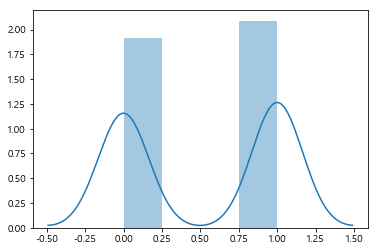

In [23]:
sns.distplot(list(earning_data))
print(earning_data.std())

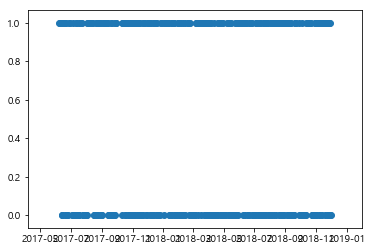

In [24]:
plt.scatter(earning_data.index,earning_data) #일일 변화율은 안정적인 편이다.

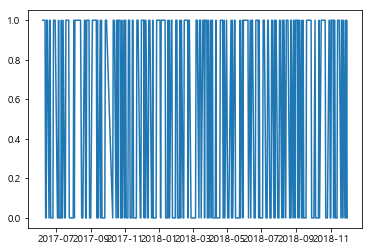

In [25]:
plt.plot(earning_data)

In [26]:
# earning_data의 전날 텍스트 빈도와 earning_data의 수익률의 짝을 맞춰야한다. 
# 주말과 휴일을 고려해야한다.
# 합치기 위해서는 earning_data의 index 정보가 필요하다.

#earning_data.index =  [date- relativedelta(days=1) for date in earning_data.index]

In [27]:
earning_data.tail()

date
2018-11-26    0
2018-11-27    1
2018-11-28    0
2018-11-29    1
2018-11-30    0
Name: return, dtype: int64

In [28]:
# 이 날짜에 있는 빈도를 수익률과 상관계수를 구할거임
data_filter_freq.index 

DatetimeIndex(['2017-06-08', '2017-06-09', '2017-06-11', '2017-06-13',
               '2017-06-16', '2017-06-18', '2017-06-23', '2017-06-29',
               '2017-06-30', '2017-07-04',
               ...
               '2018-11-17', '2018-11-20', '2018-11-22', '2018-11-23',
               '2018-11-24', '2018-11-25', '2018-11-27', '2018-11-28',
               '2018-11-29', '2018-11-30'],
              dtype='datetime64[ns]', name='date', length=288, freq=None)

In [29]:
# print(differ_date[:10])

In [30]:
# a = differ_date[0:2]
# a.append('babo')

In [31]:
# differ_date

In [32]:
data_filter_freq.shape

(288, 501)

In [33]:
########### 안되는 이유: 컬럼 갯수가 계속해서 줄어 들기 때문에 idx가 줄어든 갯수를 넘어가면 out of index bound 에러가 난다.
# for idx in range(data_filter_freq.shape[1]):
#     print(idx)
#     tag = data_filter_freq.iloc[:,idx]    
#     tag_name = tag.name
#     print(tag_name)
#     #print(data_filter_freq.columns)
#     if tag_name == './sf'or tag_name.find('/sw')>=0 or tag_name.find('/sn')>=0:
#         #del data_filter_freq.iloc[:,idx]
#         data_filter_freq.drop(columns=tag_name,inplace=True,axis=1)

In [34]:
#필요 없다고 생각되는 태그 제거

delete_column_list = []
for idx in range(data_filter_freq.shape[1]):
    
    tag = data_filter_freq.iloc[:,idx]    
    tag_name = tag.name    
    
    if tag_name == './sf'or tag_name.find('/sw')>=0 or tag_name.find('/sn')>=0:
        delete_column_list.append(tag_name)
        
data_filter_freq.drop(columns=delete_column_list,inplace=True,axis=1)
    
    
    
    
    
    



In [35]:
differ_date = sorted(list(set(data_filter_freq.index).difference(set(earning_data.index))))
#print(differ_date)
i = 0
for idx in range(len(differ_date)-1):
    #print(element)
    # 10 11 17 idx = 1
    if (differ_date[idx+1]-differ_date[idx]).days > 1:      
        #print(differ_date[i],differ_date[idx+1],data_filter_freq.loc[differ_date[i:idx+1],:].sum())
        # 휴일 or 주말이 끼면 그 날을 포함해서 다음 날에 반영한다.
        # 휴일 다음날 
        append_idx = differ_date[idx]+relativedelta(days=1)
        sum_list = differ_date[i:idx+1]
        sum_list.append(append_idx)
        data_filter_freq.loc[append_idx,:] = data_filter_freq.loc[sum_list,:].sum()//len(sum_list)
        data_filter_freq.drop(index = differ_date[i:idx+1],inplace=True)
        #del data_filter_freq.loc[differ_date[i:idx+1],:]
        #print(sum_list,'append_idx:',append_idx)
        i = idx+1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [36]:
print(len(data_filter_freq),len(earning_data))

247 358


In [37]:
differ_date1 = sorted(list(set(data_filter_freq.index).difference(set(earning_data.index))))

In [38]:
differ_date1

[Timestamp('2017-07-23 00:00:00'),
 Timestamp('2017-08-06 00:00:00'),
 Timestamp('2017-08-13 00:00:00'),
 Timestamp('2017-08-20 00:00:00'),
 Timestamp('2017-08-27 00:00:00'),
 Timestamp('2017-09-10 00:00:00'),
 Timestamp('2017-09-17 00:00:00'),
 Timestamp('2017-09-24 00:00:00'),
 Timestamp('2017-10-03 00:00:00'),
 Timestamp('2017-10-15 00:00:00'),
 Timestamp('2017-10-29 00:00:00'),
 Timestamp('2017-11-05 00:00:00'),
 Timestamp('2017-11-19 00:00:00'),
 Timestamp('2017-12-24 00:00:00'),
 Timestamp('2017-12-30 00:00:00'),
 Timestamp('2018-01-14 00:00:00'),
 Timestamp('2018-01-21 00:00:00'),
 Timestamp('2018-02-18 00:00:00'),
 Timestamp('2018-03-04 00:00:00'),
 Timestamp('2018-03-25 00:00:00'),
 Timestamp('2018-04-01 00:00:00'),
 Timestamp('2018-04-22 00:00:00'),
 Timestamp('2018-05-07 00:00:00'),
 Timestamp('2018-06-24 00:00:00'),
 Timestamp('2018-07-08 00:00:00'),
 Timestamp('2018-08-19 00:00:00'),
 Timestamp('2018-08-26 00:00:00'),
 Timestamp('2018-09-25 00:00:00'),
 Timestamp('2018-10-

In [39]:
data_filter_freq.drop(differ_date1,inplace=True,axis=0)

In [40]:
differ_date2 = sorted(list(set(earning_data.index).difference(set(data_filter_freq.index))))

In [41]:
differ_date2

[Timestamp('2017-06-14 00:00:00'),
 Timestamp('2017-06-15 00:00:00'),
 Timestamp('2017-06-20 00:00:00'),
 Timestamp('2017-06-21 00:00:00'),
 Timestamp('2017-06-22 00:00:00'),
 Timestamp('2017-06-26 00:00:00'),
 Timestamp('2017-06-27 00:00:00'),
 Timestamp('2017-07-05 00:00:00'),
 Timestamp('2017-07-06 00:00:00'),
 Timestamp('2017-07-07 00:00:00'),
 Timestamp('2017-07-10 00:00:00'),
 Timestamp('2017-07-11 00:00:00'),
 Timestamp('2017-07-14 00:00:00'),
 Timestamp('2017-07-25 00:00:00'),
 Timestamp('2017-07-26 00:00:00'),
 Timestamp('2017-07-28 00:00:00'),
 Timestamp('2017-07-31 00:00:00'),
 Timestamp('2017-08-01 00:00:00'),
 Timestamp('2017-08-07 00:00:00'),
 Timestamp('2017-08-10 00:00:00'),
 Timestamp('2017-08-14 00:00:00'),
 Timestamp('2017-08-16 00:00:00'),
 Timestamp('2017-08-17 00:00:00'),
 Timestamp('2017-08-18 00:00:00'),
 Timestamp('2017-08-21 00:00:00'),
 Timestamp('2017-08-23 00:00:00'),
 Timestamp('2017-08-24 00:00:00'),
 Timestamp('2017-08-25 00:00:00'),
 Timestamp('2017-08-

In [42]:
earning_data.drop(differ_date2, inplace=True, axis=0)

In [43]:
print(len(data_filter_freq),len(earning_data))

214 214


In [44]:
data_filter_freq

,!!/sf,!/sf,........................./se,......................../se,......................./se,....................../se,...................../se,..................../se,.................../se,................../se,...,홀딩/nng,홀딩스/nng,확보/nng,확인/nng,환율/nng,회사/nng,회장/nng,후/nng,휴맥/nng,힘/nng
date,,,,,,,,,,,,,,,,,,,,,
2017-06-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2017-06-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-30,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2017-07-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-07-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-07-13,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 감성 사전을 크게 두가지로 만들 것이다.
1. 분모를 해당 형태소 빈도 
2. 분모를 긍정글의 갯수/ 부정글의 갯수

1. 분모를 해당 형태소 빈도

In [45]:
data_filter_freq_copy = data_filter_freq
plus_dataframe1 = pd.DataFrame(columns=data_filter_freq_copy.columns)
minus_dataframe1 = pd.DataFrame(columns=data_filter_freq_copy.columns)
plus_dict1 = pd.Series([])
minus_dict1 = pd.Series([])

In [46]:
idx = 0
for idx in range(data_filter_freq.shape[0]):    
    #print(idx)
    if earning_data.iloc[idx]==1:
        #print('data_filter_freq_copy.iloc[idx,:]* 1:',data_filter_freq_copy.iloc[idx,:]* 1)
        plus_dataframe1= plus_dataframe1.append(data_filter_freq_copy.iloc[idx,:]* 1)   
        
    elif earning_data.iloc[idx]==0:
        minus_dataframe1 = minus_dataframe1.append(data_filter_freq_copy.iloc[idx,:]* -1)
    idx+=1

In [47]:
sum_plus1 = plus_dataframe1.sum(axis=0)
sum_filter_freq = data_filter_freq_copy.sum(axis=0)
for idx in range(len(sum_plus1)):
    plus_dict1 = plus_dict1.append(pd.Series(sum_plus1[idx]/sum_filter_freq[idx],index=[sum_plus1.index[idx]]))    

In [48]:
plus_dict1.sort_values(ascending=False)

답변/nng            1.000000
발생/nng            0.956522
미국/nnp            0.937500
기금/nng            0.906250
운용/nng            0.880952
전쟁/nng            0.875000
v/sl              0.869565
확보/nng            0.843750
영향/nng            0.826087
곳/nng             0.815789
m/sl              0.812500
수수료/nng           0.810811
전화/nng            0.807692
이득/nng            0.806452
공시/nng            0.800000
cj/sl             0.800000
빌리/vv             0.772727
피/nng             0.769231
읽/vv              0.764706
명부/nng            0.758621
선택/nng            0.758621
자산/nng            0.754717
합병/nng            0.750000
기/nng             0.741935
.........../se    0.735849
회장/nng            0.731959
배당금/nng           0.720000
매/nng             0.714286
시점/nng            0.710526
급락/nng            0.708333
                    ...   
위/nnb             0.333333
폭락/nng            0.325581
세계/nng            0.325000
실적/nng            0.324324
www/sl            0.320755
최근/nng            0.312500
이

In [49]:
sum_minus1 = minus_dataframe1.sum(axis=0)
sum_filter_freq = data_filter_freq_copy.sum(axis=0)
for idx in range(len(sum_minus1)):
    minus_dict1 = minus_dict1.append(pd.Series(sum_minus1[idx]/sum_filter_freq[idx],index=[sum_minus1.index[idx]]))

In [50]:
minus_dict1.sort_values(ascending=True)

환율/nng           -0.965517
ㅋ/mag            -0.846154
정수기/nng          -0.843750
ㅋ/ic             -0.823529
ㅋ/nng            -0.820513
위기/nng           -0.814815
경제/nng           -0.805970
청와대/nnp          -0.777778
대/xpn            -0.771429
petitions/sl     -0.770833
금지/nng           -0.766667
기업/nng           -0.752577
president/sl     -0.750000
연대/nng           -0.750000
go/sl            -0.750000
개선/nng           -0.736842
mbk/sl           -0.725490
명/nnb            -0.724138
성장/nng           -0.720000
금융/nng           -0.709677
재산/nng           -0.700000
들어가/vv           -0.696970
예측/nng           -0.695652
이제/mag           -0.692308
최근/nng           -0.687500
www/sl           -0.679245
실적/nng           -0.675676
세계/nng           -0.675000
폭락/nng           -0.674419
위/nnb            -0.666667
                    ...   
급락/nng           -0.291667
시점/nng           -0.289474
매/nng            -0.285714
배당금/nng          -0.280000
회장/nng           -0.268041
.........../se   -0.264151
기

In [51]:
sentimental_score1 = (plus_dict1.sort_values(ascending=False)+ minus_dict1.sort_values(ascending=False)).sort_values(ascending=False)

In [52]:
sentimental_score1

답변/nng            1.000000
발생/nng            0.913043
미국/nnp            0.875000
기금/nng            0.812500
운용/nng            0.761905
전쟁/nng            0.750000
v/sl              0.739130
확보/nng            0.687500
영향/nng            0.652174
곳/nng             0.631579
m/sl              0.625000
수수료/nng           0.621622
전화/nng            0.615385
이득/nng            0.612903
공시/nng            0.600000
cj/sl             0.600000
빌리/vv             0.545455
피/nng             0.538462
읽/vv              0.529412
명부/nng            0.517241
선택/nng            0.517241
자산/nng            0.509434
합병/nng            0.500000
기/nng             0.483871
.........../se    0.471698
회장/nng            0.463918
배당금/nng           0.440000
매/nng             0.428571
시점/nng            0.421053
급락/nng            0.416667
                    ...   
일부/nng           -0.333333
폭락/nng           -0.348837
세계/nng           -0.350000
실적/nng           -0.351351
www/sl           -0.358491
최근/nng           -0.375000
이

2. 분모를 긍정글의 갯수/ 부정글의 갯수

In [53]:
data_filter_freq_copy = data_filter_freq
plus_dataframe2 = pd.DataFrame(columns=data_filter_freq_copy.columns)
minus_dataframe2 = pd.DataFrame(columns=data_filter_freq_copy.columns)

In [54]:
data_filter_freq_copy = data_filter_freq
plus_dataframe2 = pd.DataFrame(columns=data_filter_freq_copy.columns)
minus_dataframe2 = pd.DataFrame(columns=data_filter_freq_copy.columns)

In [55]:
idx = 0
for idx in range(data_filter_freq.shape[0]):    
    #print(idx)
    if earning_data.iloc[idx]==1:
        #print('data_filter_freq_copy.iloc[idx,:]* 1:',data_filter_freq_copy.iloc[idx,:]* 1)
        plus_dataframe2= plus_dataframe1.append(data_filter_freq_copy.iloc[idx,:]* 1)   
        
    elif earning_data.iloc[idx]==0:
        minus_dataframe2 = minus_dataframe1.append(data_filter_freq_copy.iloc[idx,:]* -1)
    idx+=1

In [56]:
minus_dict2=minus_dataframe2.mean(axis=0).sort_values(ascending=False)

In [57]:
plus_dict2=plus_dataframe2.mean(axis=0).sort_values(ascending=False)

In [58]:
sentimental_score2 = (plus_dataframe2.mean(axis=0).sort_values(ascending=False)+ minus_dataframe2.mean(axis=0).sort_values(ascending=False))

In [59]:
sentimental_score2

!!/sf                          -0.036552
!/sf                           -0.402414
........................./se   -0.050690
......................../se    -0.023448
......................./se     -0.026552
....................../se      -0.012069
...................../se       -0.002069
..................../se         0.009655
.................../se          0.001379
................../se           0.017241
................./se           -0.009310
................/se            -0.024828
.............../se              0.125172
............../se               0.077586
............./se                0.242759
............/se                 0.183448
.........../se                  0.392414
........../se                   0.260000
........./se                    0.048621
......../se                     0.020690
......./se                      0.104138
....../se                       0.093793
...../se                        0.055517
..../se                         0.106552
.../se          

In [60]:
# dictionary 초기화
model_result = Counter()
train_result= Counter()
test_result = Counter()
confusion_matrix_result = Counter()
auc_result = Counter()

y = np.array(earning_data_ori)
#y = np.array(earning_data)
#y = np.array([labeling(label) for label in earning_data])



In [61]:
y_dict = {'상승':[(sum(y)/len(y))], '하락':[(1-sum(y)/len(y))]}

In [62]:
y_dict

{'상승': [0.5373831775700935], '하락': [0.46261682242990654]}

<BarContainer object of 2 artists>

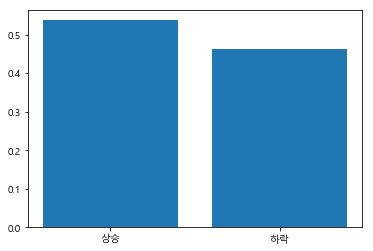

In [63]:
#pd.DataFrame.from_dict(y_dict)
plt.bar(['상승','하락'],[(sum(y)/len(y)),(1-sum(y)/len(y))])


In [64]:
# 점수를 계산한다. 
X_train_raw, X_test_raw,y_train,y_test= train_test_split(data_filter_freq,y, test_size=0.33, shuffle=False)
#X_train_index, X_test_index = train_test_split(earning_data_ori,test_size=0.33, shuffle=False)

In [65]:
data_filter_column_freq = data_filter_freq.sum(axis=0)

In [66]:
#X_train.shape

In [67]:
[(sum(y_test)/len(y_test)),(1-sum(y_test)/len(y_test))]

[0.5352112676056338, 0.46478873239436624]

In [68]:
[(sum(y_train)/len(y_train)),(1-sum(y_train)/len(y_train))]

[0.5384615384615384, 0.46153846153846156]

# 점수를 하나로만

In [69]:
# if X_train_raw.iloc[0,:].sum() == 0:
#     result = 0
#X_train_raw.iloc[0,:] != 0
#값이 존재하는 형태소 추출
X_train = pd.Series()
for train_idx in range(X_train_raw.shape[0]):
    #해당번째 열 추출
    train_iloc = X_train_raw.iloc[train_idx,:]
    #값이존재하는 형태소 추출
    select_pos = train_iloc.index[train_iloc != 0]
    # 그 형태소의 인덱스
    select_idx=[]
    for pos_idx, pos_element in enumerate(select_pos):
        for column_idx,column_element in enumerate(X_train_raw.columns):
            if column_element == pos_element:
                select_idx.append(column_idx)
    # 빈도
    select_series = X_train_raw.iloc[train_idx,select_idx]    
    #(점수 * 빈도)총합/ 빈도 
    
    X_train[train_iloc.name]=(sentimental_score1[select_pos] * select_series).mean()
X_train.fillna(0,inplace=True)



#X_train_raw.iloc[0,:]


#X_train_raw.loc[:,select_pos]
    
    
#X_train_raw.iloc[0,X_train_raw.iloc[0,:].index[X_train_raw.iloc[0,:] != 0]]
#X_train_raw.iloc[0,:] != 0
#X_train_raw.iloc[0,X_train_raw.iloc[0,:] != 0]
#/X_train_raw.iloc[0,:].sum()
# row 마다 감성사전에서 점수를 계산한다 



# 긍정부정 나눠서

In [70]:
#train 부정 전처리 함수
def train_pos_neg_processing(X_train_raw):
    X_train = pd.DataFrame(columns=['긍정','부정'])
    for train_idx in range(X_train_raw.shape[0]):
        #해당번째 열 추출
        train_iloc = X_train_raw.iloc[train_idx,:]
        #값이존재하는 형태소 추출
        select_pos = train_iloc.index[train_iloc != 0]
        # 그 형태소의 인덱스
        select_idx=[]
        for pos_idx, pos_element in enumerate(select_pos):
            for column_idx,column_element in enumerate(X_train_raw.columns):
                if column_element == pos_element:
                    select_idx.append(column_idx)
        # 빈도
        select_series = X_train_raw.iloc[train_idx,select_idx]    
        #(점수 * 빈도)총합/ 빈도 


        #plus_dict의 해당 형태소 점수를 뽑아오는 것이 목표이다.
        #indexing하면 error뜨고 
        #plus_dict에 해당 형태소가 존재하면

    #     print(select_pos)
    #     print(plus_dict[select_pos].dtype)

        plus_pos = []
        for value in select_pos:
            for element in plus_dict1.index:
                if value == element:
                    plus_pos.append(element)
        plus_idx = []            
        for pos_idx, pos_element in enumerate(plus_pos):
            for column_idx,column_element in enumerate(X_train_raw.columns):
                if column_element == pos_element:
                    plus_idx.append(column_idx)

        minus_pos = []
        for value in select_pos:
            for element in minus_dict1.index:
                if value == element:
                    minus_pos.append(element)

        minus_idx = []            
        for pos_idx, pos_element in enumerate(minus_pos):
            for column_idx,column_element in enumerate(X_train_raw.columns):
                if column_element == pos_element:
                    minus_idx.append(column_idx)


        pos_freq = X_train_raw.iloc[train_idx,plus_idx]
        pos_freq_sum = pos_freq.sum()  
        pos_score_dot_freq = np.dot(plus_dict1[plus_pos],X_train_raw.iloc[train_idx,plus_idx])
        minus_freq_sum = X_train_raw.iloc[train_idx,minus_idx].sum()
        minus_score_dot_freq = np.dot(minus_dict1[minus_pos],X_train_raw.iloc[train_idx,minus_idx])    
        X_train = X_train.append(pd.DataFrame([[pos_score_dot_freq/pos_freq_sum,(minus_score_dot_freq/minus_freq_sum)*(-1)]],columns=X_train.columns,index=[pos_freq.name]))    
    X_train.fillna(0,inplace=True)
    return X_train



In [71]:
# X_train = pd.DataFrame(columns=['긍정','부정'])
# for train_idx in range(X_train_raw.shape[0]):
#     #해당번째 열 추출
#     train_iloc = X_train_raw.iloc[train_idx,:]
#     #값이존재하는 형태소 추출
#     select_pos = train_iloc.index[train_iloc != 0]
#     # 그 형태소의 인덱스
#     select_idx=[]
#     for pos_idx, pos_element in enumerate(select_pos):
#         for column_idx,column_element in enumerate(X_train_raw.columns):
#             if column_element == pos_element:
#                 select_idx.append(column_idx)
#     # 빈도
#     select_series = X_train_raw.iloc[train_idx,select_idx]    
#     #(점수 * 빈도)총합/ 빈도 
    
    
#     #plus_dict의 해당 형태소 점수를 뽑아오는 것이 목표이다.
#     #indexing하면 error뜨고 
#     #plus_dict에 해당 형태소가 존재하면
    
# #     print(select_pos)
# #     print(plus_dict[select_pos].dtype)
    
#     plus_pos = []
#     for value in select_pos:
#         for element in plus_dict1.index:
#             if value == element:
#                 plus_pos.append(element)
#     plus_idx = []            
#     for pos_idx, pos_element in enumerate(plus_pos):
#         for column_idx,column_element in enumerate(X_train_raw.columns):
#             if column_element == pos_element:
#                 plus_idx.append(column_idx)
                
#     minus_pos = []
#     for value in select_pos:
#         for element in minus_dict1.index:
#             if value == element:
#                 minus_pos.append(element)
                
#     minus_idx = []            
#     for pos_idx, pos_element in enumerate(minus_pos):
#         for column_idx,column_element in enumerate(X_train_raw.columns):
#             if column_element == pos_element:
#                 minus_idx.append(column_idx)
    
                
# #     print('plus_pos,minus_pos',plus_pos,minus_pos)
# #     print('plus_idx,minus_idx',plus_idx,minus_idx)
#     # t시점의 형태소 빈도 * 그 형태소의 점수 /해당 시점의 형태소의 합
#     # 긍정
#     # 각 시점의 각 형태소 갯수
#     #print(X_train_raw.iloc[train_idx,plus_idx])
#     # 각 시점의 형태소 합 
#     pos_freq = X_train_raw.iloc[train_idx,plus_idx]
#     pos_freq_sum = pos_freq.sum()
#     #print(pos_freq_sum)
#     pos_score_dot_freq = np.dot(plus_dict1[plus_pos],X_train_raw.iloc[train_idx,plus_idx])
#     #print(pos_score_dot_freq)
    
#     #print(X_train_raw.iloc[train_idx,plus_idx])
#     # 각 시점의 형태소 합 
#     minus_freq_sum = X_train_raw.iloc[train_idx,minus_idx].sum()
#     #print(minus_freq_sum)
#     minus_score_dot_freq = np.dot(minus_dict1[minus_pos],X_train_raw.iloc[train_idx,minus_idx])
#     #print(minus_score_dot_freq)
#     #print(plus_dict1[plus_pos] * X_train_raw.iloc[train_idx,plus_idx]/data_filter_column_freq[plus_pos])
#     #print(pd.DataFrame([[pos_score_dot_freq/pos_freq_sum,minus_score_dot_freq/minus_freq_sum]],columns=X_train.columns,index=[pos_freq.name]))
#     X_train = X_train.append(pd.DataFrame([[pos_score_dot_freq/pos_freq_sum,minus_score_dot_freq/minus_freq_sum]],columns=X_train.columns,index=[pos_freq.name]))
#     #X_train['부정'].append(minus_dict1[minus_pos] * X_train_raw.iloc[train_idx,minus_idx]/data_filter_column_freq[minus_pos])           
    
    
    
    
#     #minus_dict에 해당 형태소가 존재하면    
    
#     #X_train[train_iloc.name,]=(sentimental_score1[select_pos] * select_series).mean()
    
    
# X_train.fillna(0,inplace=True)



In [72]:
X_train

2017-06-08    0.028687
2017-06-09    0.059336
2017-06-13    0.007711
2017-06-16   -0.004414
2017-06-23    0.000000
2017-06-30    0.000000
2017-07-04    0.000000
2017-07-12   -0.246828
2017-07-13    0.050712
2017-07-18   -0.130734
2017-07-19   -0.067405
2017-07-20   -0.019135
2017-07-21   -0.015459
2017-07-24   -0.042543
2017-07-27    0.269926
2017-08-02    0.011096
2017-08-03   -0.080118
2017-08-04   -0.004748
2017-08-08   -0.049760
2017-08-09    0.000000
2017-08-11   -0.010202
2017-08-22    0.152688
2017-08-30   -0.166510
2017-09-01   -0.017456
2017-09-06    0.141297
2017-09-07    0.004987
2017-09-15   -0.218045
2017-09-19   -0.147529
2017-09-27    0.000000
2017-09-28    0.008387
                ...   
2018-05-14    0.164654
2018-05-15    0.459605
2018-05-16    0.021190
2018-05-17    0.073448
2018-05-18    0.647600
2018-05-21    0.309365
2018-05-23    0.141788
2018-05-24    0.224257
2018-05-25    0.063221
2018-05-28    0.135611
2018-05-29    0.240983
2018-05-30    0.041526
2018-05-31 

In [73]:
X_train = train_pos_neg_processing(X_train_raw)
X_test = train_pos_neg_processing(X_test_raw)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in double_scalars


In [74]:
X_train.shape

(143, 2)

In [75]:
y_train.shape

(143,)

In [76]:
model_result = Counter()
train_result= Counter()
test_result = Counter()
confusion_matrix_result = Counter()
auc_result = Counter()
precision_score_result=Counter()
lenx=X_train.shape
# if lenx[0]<=10 or lenx[1]<=2:
#     continue
classifiers = []
classifiers_not = []
random_state = [4000]



# gsRFC = (RFC,rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1]
kernel = ['linear', 'rbf', 'sigmoid']#'precomputed','poly'
nfolds=5
criterion = ["gini", 'entropy']
#grid_search = (SVC(), param_grid_svc, cv=nfolds)
n_estimators = [500,1000,2000]
learning_rate = [0.01]
max_depth = [3, 5, 10, 15 ,20]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
scoring = 'accuracy'
n_jobs= -1
penalty= ['l2']
max_features = [2]


#gsExtC = (ExtraTreesClassifier, ex_param_grid, cv=nfold, scoring="auc")

print('X_train_shape:',X_train.shape)
classifiers.append(SVC(random_state=4000))
classifiers.append(RandomForestClassifier(random_state=4000))
classifiers.append(ExtraTreesClassifier(random_state=4000))
classifiers.append(GradientBoostingClassifier(random_state=4000))

classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(penalty='l2',random_state=4000))

classifiers.append(XGBClassifier(random_state=4000))
classifiers.append(LinearSVC(random_state=4000))
classifiers.append(MLPClassifier(random_state=4000))



classifiers_not.append(LinearDiscriminantAnalysis())# 튜닝 불가능
classifiers_not.append(GaussianNB())
classifiers_not.append(MultinomialNB())
classifiers_not.append(BernoulliNB())



#classifiers.append(XGBClassifier())
test_accuracy_list = []
train_accuracy_list= [] 
model_accuracy_list= []
confusion_matrix_list = []
precision_score_list = []
auc_list = []
for models in classifiers:
    #print(models)
    models.fit(X_train,y_train)
    
    model_str = str(models).split('(')[0]
    
    pre = models.predict(X_test)
    
    tmp_dict1 = {}
    tmp_dict1[model_str] = models.score(X_test,y_test)
    test_accuracy_list.append(tmp_dict1)
    
    tmp_dict2 = {}
    tmp_dict2[model_str] = models.score(X_train,y_train)
    train_accuracy_list.append(tmp_dict2)
    
    tmp_dict3 = {}
    tmp_dict3[model_str] = metrics.accuracy_score(y_test, pre)
    model_accuracy_list.append(tmp_dict3)
    
    # 전역변수로, 지역변수 문제라 생각한다.
    tmp_dict4 = {}
    tmp_dict4[model_str] = confusion_matrix(y_test,pre)
    confusion_matrix_list.append(tmp_dict4)
    
    
    tmp_dict5 ={}
    tmp_dict5[model_str] = metrics.precision_score(y_test,pre)
    precision_score_list.append(tmp_dict5)
    #confusion_matrix_list.append(confusion_matrix(y_test,pre))
for models in classifiers_not:
    
    models.fit(X_train,y_train)
    
    model_str = str(models).split('(')[0]
    pre = models.predict(X_test)
    
    tmp_dict1 = {}
    tmp_dict1[model_str] = models.score(X_test,y_test)
    test_accuracy_list.append(tmp_dict1)
    
    tmp_dict2 = {}
    tmp_dict2[model_str] = models.score(X_train,y_train)
    train_accuracy_list.append(tmp_dict2)
    
    tmp_dict3 = {}
    tmp_dict3[model_str] = metrics.accuracy_score(y_test, pre)
    model_accuracy_list.append(tmp_dict3)
    
    # 전역변수로, 지역변수 문제라 생각한다.
    tmp_dict4 = {}
    tmp_dict4[model_str] = confusion_matrix(y_test,pre)
    confusion_matrix_list.append(tmp_dict4)
    
    tmp_dict5 ={}
    tmp_dict5[model_str] = metrics.precision_score(y_test,pre)
    precision_score_list.append(tmp_dict5)
    
    #confusion_matrix_list.append(confusion_matrix(y_test,pre))    

    
train_result[stock_code] = train_accuracy_list
test_result[stock_code] = test_accuracy_list
model_result[stock_code] = model_accuracy_list
confusion_matrix_result[stock_code] = confusion_matrix_list
precision_score_result[stock_code]=precision_score_list



X_train_shape: (143, 2)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [77]:
model_list=['SVC',
'Randomforest',
'Extratrees',
'Gradientboosting',
'Kneighbors',
'Logistic',
'Xgboost',
'LinearSVC',
'MLP']

In [78]:
# for idx,element in enumerate(model_list):    
#     tmp_dict = {}
#     tmp_dict[element] = confusion_matrix_result[stock_code][idx]['GridSearchCV']
#     confusion_matrix_result[stock_code][idx] = tmp_dict
# print(confusion_matrix_result)
# for idx,element in enumerate(model_list):    
#     tmp_dict = {}
#     tmp_dict[element] = model_result[stock_code][idx]['GridSearchCV']
#     model_result[stock_code][idx] = tmp_dict
# print(model_result)
# for idx,element in enumerate(model_list):    
#     tmp_dict = {}
#     tmp_dict[element] = train_result[stock_code][idx]['GridSearchCV']
#     train_result[stock_code][idx] = tmp_dict
# print(train_result)
# for idx,element in enumerate(model_list):    
#     tmp_dict = {}
#     tmp_dict[element] = test_result[stock_code][idx]['GridSearchCV']
#     test_result[stock_code][idx] = tmp_dict
# print(test_result)
# for idx,element in enumerate(model_list):    
#     tmp_dict = {}
#     tmp_dict[element] = precision_score_result[stock_code][idx]['GridSearchCV']
#     precision_score_result[stock_code][idx] = tmp_dict
# print(precision_score_result)     
# for idx,element in enumerate(model_list):    
#     tmp_dict = {}
#     tmp_dict[element] = precision_train_result[stock_code][idx]['GridSearchCV']
#     precision_train_result[stock_code][idx] = tmp_dict
# print(precision_score_result)   

In [79]:
for element in train_accuracy_list:
    for key in element.keys():
        if key.find('RandomForestClassifier')>=0:
            element['RF'] = element[key]
            del element[key]
        if key.find('ExtraTreesClassifier')>=0:        
            element['ET'] = element[key]
            del element[key]
        if key.find('GradientBoostingClassifier')>=0:        
            element['GB'] = element[key]
            del element[key]
        if key.find('KNeighborsClassifier')>=0:        
            element['KNN'] = element[key]
            del element[key]
        if key.find('LogisticRegression')>=0:        
            element['LR'] = element[key]
            del element[key]
        if key.find('XGBClassifier')>=0:        
            element['XGB'] = element[key]
            del element[key]
        if key.find('LinearSVC')>=0:        
            element['LSVC'] = element[key]
            del element[key]        
        if key.find('MLPClassifier')>=0:        
            element['MLP'] = element[key]
            del element[key]
        if key.find('LinearDiscriminantAnalysis')>=0:        
            element['LDA'] = element[key]
            del element[key]
        if key.find('GaussianNB')>=0:        
            element['GNB'] = element[key]
            del element[key]
        if key.find('MultinomialNB')>=0:        
            element['MNB'] = element[key]
            del element[key]
        if key.find('BernoulliNB')>=0:        
            element['BNB'] = element[key]
            del element[key]

In [80]:
train_dict=Counter()
for element in train_accuracy_list:
    train_dict.update(element)


In [81]:
color_dict= dict(zip(train_dict.keys(),sns.color_palette("hls", len(classifiers)+len(classifiers_not))))
color_dict

{'SVC': (0.86, 0.3712, 0.33999999999999997),
 'RF': (0.86, 0.6112, 0.33999999999999997),
 'ET': (0.86, 0.8512000000000001, 0.33999999999999997),
 'GB': (0.6287999999999998, 0.86, 0.33999999999999997),
 'KNN': (0.38880000000000003, 0.86, 0.33999999999999997),
 'LR': (0.33999999999999997, 0.86, 0.5312000000000001),
 'XGB': (0.33999999999999997, 0.86, 0.7712000000000001),
 'LSVC': (0.33999999999999997, 0.7087999999999995, 0.86),
 'MLP': (0.33999999999999997, 0.4687999999999997, 0.86),
 'LDA': (0.4511999999999997, 0.33999999999999997, 0.86),
 'GNB': (0.6912000000000003, 0.33999999999999997, 0.86),
 'MNB': (0.86, 0.33999999999999997, 0.7887999999999993),
 'BNB': (0.86, 0.33999999999999997, 0.5487999999999995)}

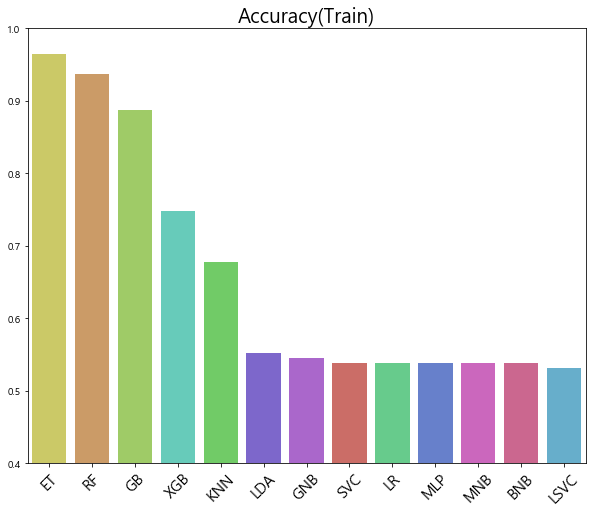

In [82]:
train_keys=sorted(train_dict,key=lambda x:train_dict[x],reverse=True)
train_values=sorted(train_dict.values(),reverse=True)
plt.figure(figsize=(10,8))
plt.title('Accuracy(Train)',fontsize = 20)
plt.xticks(rotation=45,fontsize=15)
plt.ylim((0.4,1))
sns.barplot(train_keys,train_values,palette=[color_dict[key] for key in train_keys]) # 그래프가 바뀌어도 분류기에 대한 색깔이 변치 않기위해

In [83]:
for element in test_accuracy_list:
    for key in element.keys():
        if key.find('RandomForestClassifier')>=0:
            element['RF'] = element[key]
            del element[key]
        if key.find('ExtraTreesClassifier')>=0:        
            element['ET'] = element[key]
            del element[key]
        if key.find('GradientBoostingClassifier')>=0:        
            element['GB'] = element[key]
            del element[key]
        if key.find('KNeighborsClassifier')>=0:        
            element['KNN'] = element[key]
            del element[key]
        if key.find('LogisticRegression')>=0:        
            element['LR'] = element[key]
            del element[key]
        if key.find('XGBClassifier')>=0:        
            element['XGB'] = element[key]
            del element[key]
        if key.find('LinearSVC')>=0:        
            element['LSVC'] = element[key]
            del element[key]        
        if key.find('MLPClassifier')>=0:        
            element['MLP'] = element[key]
            del element[key]
        if key.find('LinearDiscriminantAnalysis')>=0:        
            element['LDA'] = element[key]
            del element[key]
        if key.find('GaussianNB')>=0:        
            element['GNB'] = element[key]
            del element[key]
        if key.find('MultinomialNB')>=0:        
            element['MNB'] = element[key]
            del element[key]
        if key.find('BernoulliNB')>=0:        
            element['BNB'] = element[key]
            del element[key]

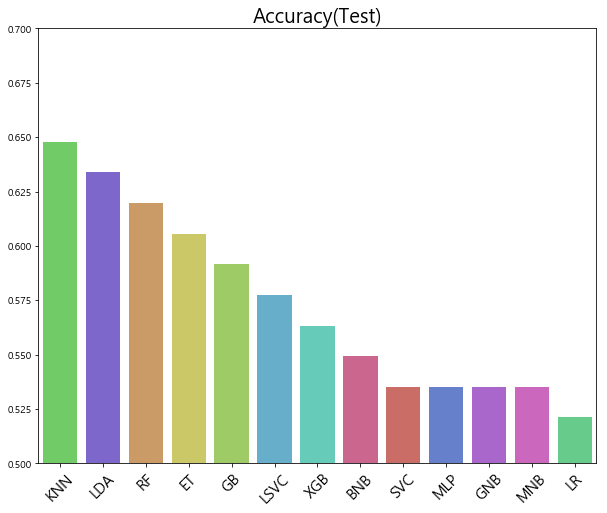

In [84]:
test_dict=Counter()
for element in test_accuracy_list:
    test_dict.update(element)
test_keys=sorted(test_dict.keys(),key=lambda x:test_dict[x],reverse=True)
test_values=sorted(test_dict.values(),reverse=True)
plt.figure(figsize=(10,8))
plt.title('Accuracy(Test)',fontsize=20)
plt.xticks(rotation=45,fontsize=15)
plt.ylim((0.5,0.7))
sns.barplot(test_keys,test_values,palette=[color_dict[key] for key in test_keys])

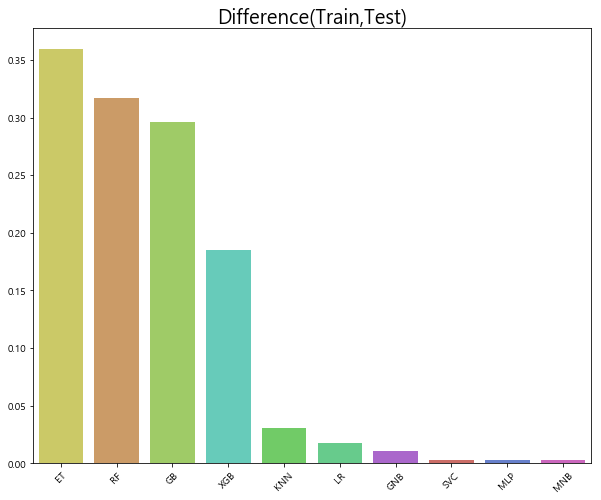

In [85]:
train_test_dict = train_dict - test_dict
test_keys=sorted(train_test_dict.keys(),key=lambda x:train_test_dict[x],reverse=True)
test_values=sorted(train_test_dict.values(),reverse=True)
plt.figure(figsize=(10,8))
plt.title('Difference(Train,Test)',fontsize=20)
plt.xticks(rotation=45)

sns.barplot(test_keys,test_values,palette=[color_dict[key] for key in test_keys])

In [86]:
for element in precision_score_list:
    for key in element.keys():
        if key.find('RandomForestClassifier')>=0:
            element['RF'] = element[key]
            del element[key]
        if key.find('ExtraTreesClassifier')>=0:        
            element['ET'] = element[key]
            del element[key]
        if key.find('GradientBoostingClassifier')>=0:        
            element['GB'] = element[key]
            del element[key]
        if key.find('KNeighborsClassifier')>=0:        
            element['KNN'] = element[key]
            del element[key]
        if key.find('LogisticRegression')>=0:        
            element['LR'] = element[key]
            del element[key]
        if key.find('XGBClassifier')>=0:        
            element['XGB'] = element[key]
            del element[key]
        if key.find('LinearSVC')>=0:        
            element['LSVC'] = element[key]
            del element[key]        
        if key.find('MLPClassifier')>=0:        
            element['MLP'] = element[key]
            del element[key]
        if key.find('LinearDiscriminantAnalysis')>=0:        
            element['LDA'] = element[key]
            del element[key]
        if key.find('GaussianNB')>=0:        
            element['GNB'] = element[key]
            del element[key]
        if key.find('MultinomialNB')>=0:        
            element['MNB'] = element[key]
            del element[key]
        if key.find('BernoulliNB')>=0:        
            element['BNB'] = element[key]
            del element[key]

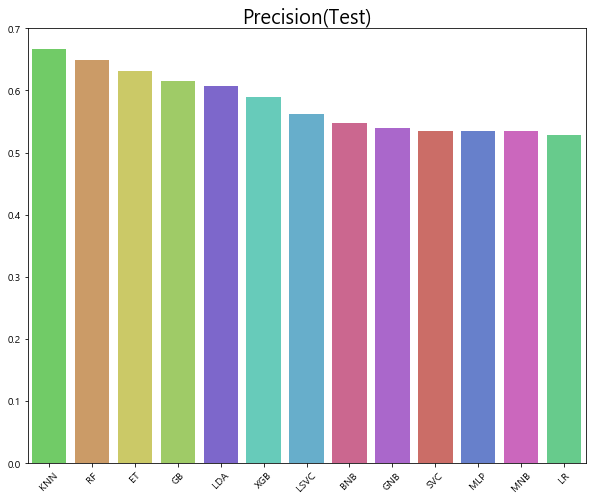

In [87]:
precision_score_dict={}
for element in precision_score_list:
    precision_score_dict.update(element)
precision_score_keys=sorted(precision_score_dict.keys(),key=lambda x:precision_score_dict[x],reverse=True)
precision_score_values=sorted(precision_score_dict.values(),reverse=True)
plt.figure(figsize=(10,8))
plt.title('Precision(Test)',fontsize=20)
plt.xticks(rotation=45)
sns.barplot(precision_score_keys,precision_score_values,palette=[color_dict[key] for key in precision_score_keys])

In [88]:
train_dict

Counter({'SVC': 0.5384615384615384,
         'RF': 0.9370629370629371,
         'ET': 0.965034965034965,
         'GB': 0.8881118881118881,
         'KNN': 0.6783216783216783,
         'LR': 0.5384615384615384,
         'XGB': 0.7482517482517482,
         'LSVC': 0.5314685314685315,
         'MLP': 0.5384615384615384,
         'LDA': 0.5524475524475524,
         'GNB': 0.5454545454545454,
         'MNB': 0.5384615384615384,
         'BNB': 0.5384615384615384})

In [89]:
test_dict

Counter({'SVC': 0.5352112676056338,
         'RF': 0.6197183098591549,
         'ET': 0.6056338028169014,
         'GB': 0.5915492957746479,
         'KNN': 0.647887323943662,
         'LR': 0.5211267605633803,
         'XGB': 0.5633802816901409,
         'LSVC': 0.5774647887323944,
         'MLP': 0.5352112676056338,
         'LDA': 0.6338028169014085,
         'GNB': 0.5352112676056338,
         'MNB': 0.5352112676056338,
         'BNB': 0.5492957746478874})

In [90]:
precision_score_dict

{'SVC': 0.5352112676056338,
 'RF': 0.6486486486486487,
 'ET': 0.631578947368421,
 'GB': 0.6153846153846154,
 'KNN': 0.6666666666666666,
 'LR': 0.5285714285714286,
 'XGB': 0.5897435897435898,
 'LSVC': 0.5625,
 'MLP': 0.5352112676056338,
 'LDA': 0.6071428571428571,
 'GNB': 0.5396825396825397,
 'MNB': 0.5352112676056338,
 'BNB': 0.546875}

### scaling 이전 start

# 상위모델 선정O

In [91]:
model_result = Counter()
train_result= Counter()
test_result = Counter()
confusion_matrix_result = Counter()
auc_result = Counter()
precision_score_result=Counter()
precision_train_result = Counter()
lenx=X_train.shape
# if lenx[0]<=10 or lenx[1]<=2:
#     continue
classifiers = []
classifiers_not = []
random_state = [4000]



# gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1]
kernel = ['linear', 'rbf', 'sigmoid']#'precomputed','poly'
nfolds=5
criterion = ["gini", 'entropy']
#grid_search = GridSearchCV(SVC(), param_grid_svc, cv=nfolds)
n_estimators = [500,1000,2000]
learning_rate = [0.01]
max_depth = [3, 5, 10, 15 ,20]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
scoring = 'accuracy'
n_jobs= -1
penalty= ['l2']
max_features = [2]
linearscv_param_grid = {'C':Cs, 'penalty':penalty, 'random_state':random_state }

svc_param_grid = {'C': Cs, 'gamma' : gammas,'kernel':kernel, 'random_state':random_state }

ex_param_grid = {"max_depth": [3, 5, 10,15,20],
              "max_features": max_features,
              "bootstrap": [False,True],
              "n_estimators" :n_estimators,
              "criterion": criterion, 'random_state':random_state }


gb_param_grid = {'loss' : ["deviance",'exponential'],
              'n_estimators' : n_estimators,
              'learning_rate': learning_rate,
              'max_depth': max_depth,
              'min_samples_leaf': [200,400,600],
              'max_features': [0.3, 0.1], 'random_state':random_state  
              }

rf_param_grid = {"max_depth": [3,4,5,10,15,20],
              "max_features": max_features,
              "n_estimators" :n_estimators,
              "criterion": criterion, 'random_state':random_state }

logistic_param_grid = {
    'C': Cs                                   
              }

lda_param_grid = {'solver' : ["svd",'lsqr','eigen'],
              'shrinkage ' : ['auto'], 'random_state':random_state 
              }

kneighbor_param_grid = {'n_neighbors':list(range(1,31))}

xgboost_param_grid ={
    'gamma':[i/10.0 for i in range(0,5)],
     'subsample':[i/100.0 for i in range(75,90,5)],
     'colsample_bytree':[i/100.0 for i in range(75,90,5)],
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
    'n_estimators':[100,500,1000,2000], 'random_state':random_state 
}

naive_bayes_param_grid = {
    'priors':None, 'random_state':random_state 
}

mlp_param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05,0.1,1,10,100],
    'learning_rate': ['constant','adaptive'],
    'max_iter':[1000,2000,5000,10000], 'random_state':random_state 
}


#gsExtC = GridSearchCV(ExtraTreesClassifier, param_grid = ex_param_grid, cv=nfold, scoring="auc")

print('X_train_shape:',X_train.shape)

classifiers.append(GridSearchCV(RandomForestClassifier(),param_grid = rf_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))
classifiers.append(GridSearchCV(ExtraTreesClassifier(), param_grid = ex_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))
classifiers.append(GridSearchCV(GradientBoostingClassifier(),param_grid = gb_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))


classifiers.append(GridSearchCV(KNeighborsClassifier(),param_grid=kneighbor_param_grid,cv=nfolds, scoring=scoring, n_jobs=-1))
classifiers_not.append(LinearDiscriminantAnalysis())




#classifiers.append(XGBClassifier())
test_accuracy_list = []
train_accuracy_list= [] 
model_accuracy_list= []
confusion_matrix_list = []
precision_score_list = []
precision_train_list = []
auc_list = []
for models in classifiers:
    #print(models)
    models.fit(X_train,y_train)
    
    model_str = str(models).split('(')[0]
    print(model_str,':',models.best_params_)
    pre = models.predict(X_test)
    
    tmp_dict1 = {}
    tmp_dict1[model_str] = models.score(X_test,y_test)
    test_accuracy_list.append(tmp_dict1)
    
    tmp_dict2 = {}
    tmp_dict2[model_str] = models.score(X_train,y_train)
    train_accuracy_list.append(tmp_dict2)
    
    tmp_dict3 = {}
    tmp_dict3[model_str] = metrics.accuracy_score(y_test, pre)
    model_accuracy_list.append(tmp_dict3)
    
    # 전역변수로, 지역변수 문제라 생각한다.
    tmp_dict4 = {}
    tmp_dict4[model_str] = confusion_matrix(y_test,pre)
    confusion_matrix_list.append(tmp_dict4)
    
    tmp_dict5 ={}
    tmp_dict5[model_str] = metrics.precision_score(y_test,pre)
    precision_score_list.append(tmp_dict5)
    #confusion_matrix_list.append(confusion_matrix(y_test,pre))    
    #confusion_matrix_list.append(confusion_matrix(y_test,pre))  
for models in classifiers_not:
    
    models.fit(X_train,y_train)
    
    model_str = str(models).split('(')[0]
    pre = models.predict(X_test)
    
    tmp_dict1 = {}
    tmp_dict1[model_str] = models.score(X_test,y_test)
    test_accuracy_list.append(tmp_dict1)
    
    tmp_dict2 = {}
    tmp_dict2[model_str] = models.score(X_train,y_train)
    train_accuracy_list.append(tmp_dict2)
    
    tmp_dict3 = {}
    tmp_dict3[model_str] = metrics.accuracy_score(y_test, pre)
    model_accuracy_list.append(tmp_dict3)
    
    # 전역변수로, 지역변수 문제라 생각한다.
    tmp_dict4 = {}
    tmp_dict4[model_str] = confusion_matrix(y_test,pre)
    confusion_matrix_list.append(tmp_dict4)
    
    tmp_dict5 ={}
    tmp_dict5[model_str] = metrics.precision_score(y_test,pre)
    precision_score_list.append(tmp_dict5)

    
train_result[stock_code] = train_accuracy_list
test_result[stock_code] = test_accuracy_list
model_result[stock_code] = model_accuracy_list
confusion_matrix_result[stock_code] = confusion_matrix_list
precision_score_result[stock_code]=precision_score_list
precision_train_result[stock_code]=precision_train_list



X_train_shape: (143, 2)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV : {'criterion': 'entropy', 'max_depth': 3, 'max_features': 2, 'n_estimators': 500, 'random_state': 4000}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV : {'bootstrap': False, 'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'n_estimators': 500, 'random_state': 4000}
GridSearchCV : {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 3, 'max_features': 0.3, 'min_samples_leaf': 200, 'n_estimators': 500, 'random_state': 4000}
GridSearchCV : {'n_neighbors': 26}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [92]:
model_result

Counter({'021240': [{'GridSearchCV': 0.6619718309859155},
          {'GridSearchCV': 0.6901408450704225},
          {'GridSearchCV': 0.5352112676056338},
          {'GridSearchCV': 0.676056338028169},
          {'LinearDiscriminantAnalysis': 0.6338028169014085}]})

In [93]:
classifiers.append(GridSearchCV(RandomForestClassifier(),param_grid = rf_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))
classifiers.append(GridSearchCV(ExtraTreesClassifier(), param_grid = ex_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))
classifiers.append(GridSearchCV(GradientBoostingClassifier(),param_grid = gb_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))


classifiers.append(GridSearchCV(KNeighborsClassifier(),param_grid=kneighbor_param_grid,cv=nfolds, scoring=scoring, n_jobs=-1))
classifiers_not.append(LinearDiscriminantAnalysis())

In [94]:
model_list=[
'RandomForestClassifier',
'ExtraTreesClassifier',
'GradientBoostingClassifier',
'KNeighborsClassifier'

]

In [95]:
for idx,element in enumerate(model_list):    
    tmp_dict = {}
    tmp_dict[element] = model_result[stock_code][idx]['GridSearchCV']
    model_result[stock_code][idx] = tmp_dict
print(model_result)
for idx,element in enumerate(model_list):    
    tmp_dict = {}
    tmp_dict[element] = train_result[stock_code][idx]['GridSearchCV']
    train_result[stock_code][idx] = tmp_dict
print(train_result)
for idx,element in enumerate(model_list):    
    tmp_dict = {}
    tmp_dict[element] = test_result[stock_code][idx]['GridSearchCV']
    test_result[stock_code][idx] = tmp_dict
print(test_result)
for idx,element in enumerate(model_list):    
    tmp_dict = {}
    tmp_dict[element] = precision_score_result[stock_code][idx]['GridSearchCV']
    precision_score_result[stock_code][idx] = tmp_dict
print(precision_score_result)     


Counter({'021240': [{'RandomForestClassifier': 0.6619718309859155}, {'ExtraTreesClassifier': 0.6901408450704225}, {'GradientBoostingClassifier': 0.5352112676056338}, {'KNeighborsClassifier': 0.676056338028169}, {'LinearDiscriminantAnalysis': 0.6338028169014085}]})
Counter({'021240': [{'RandomForestClassifier': 0.6923076923076923}, {'ExtraTreesClassifier': 0.6853146853146853}, {'GradientBoostingClassifier': 0.5384615384615384}, {'KNeighborsClassifier': 0.6293706293706294}, {'LinearDiscriminantAnalysis': 0.5524475524475524}]})
Counter({'021240': [{'RandomForestClassifier': 0.6619718309859155}, {'ExtraTreesClassifier': 0.6901408450704225}, {'GradientBoostingClassifier': 0.5352112676056338}, {'KNeighborsClassifier': 0.676056338028169}, {'LinearDiscriminantAnalysis': 0.6338028169014085}]})
Counter({'021240': [{'RandomForestClassifier': 0.6842105263157895}, {'ExtraTreesClassifier': 0.7}, {'GradientBoostingClassifier': 0.5352112676056338}, {'KNeighborsClassifier': 0.7777777777777778}, {'Linea

In [96]:
train_accuracy_list

[{'RandomForestClassifier': 0.6923076923076923},
 {'ExtraTreesClassifier': 0.6853146853146853},
 {'GradientBoostingClassifier': 0.5384615384615384},
 {'KNeighborsClassifier': 0.6293706293706294},
 {'LinearDiscriminantAnalysis': 0.5524475524475524}]

In [97]:
test_accuracy_list

[{'RandomForestClassifier': 0.6619718309859155},
 {'ExtraTreesClassifier': 0.6901408450704225},
 {'GradientBoostingClassifier': 0.5352112676056338},
 {'KNeighborsClassifier': 0.676056338028169},
 {'LinearDiscriminantAnalysis': 0.6338028169014085}]

In [98]:
precision_score_result

Counter({'021240': [{'RandomForestClassifier': 0.6842105263157895},
          {'ExtraTreesClassifier': 0.7},
          {'GradientBoostingClassifier': 0.5352112676056338},
          {'KNeighborsClassifier': 0.7777777777777778},
          {'LinearDiscriminantAnalysis': 0.6071428571428571}]})

In [99]:
color_dict

{'SVC': (0.86, 0.3712, 0.33999999999999997),
 'RF': (0.86, 0.6112, 0.33999999999999997),
 'ET': (0.86, 0.8512000000000001, 0.33999999999999997),
 'GB': (0.6287999999999998, 0.86, 0.33999999999999997),
 'KNN': (0.38880000000000003, 0.86, 0.33999999999999997),
 'LR': (0.33999999999999997, 0.86, 0.5312000000000001),
 'XGB': (0.33999999999999997, 0.86, 0.7712000000000001),
 'LSVC': (0.33999999999999997, 0.7087999999999995, 0.86),
 'MLP': (0.33999999999999997, 0.4687999999999997, 0.86),
 'LDA': (0.4511999999999997, 0.33999999999999997, 0.86),
 'GNB': (0.6912000000000003, 0.33999999999999997, 0.86),
 'MNB': (0.86, 0.33999999999999997, 0.7887999999999993),
 'BNB': (0.86, 0.33999999999999997, 0.5487999999999995)}

In [100]:
train_dict

Counter({'SVC': 0.5384615384615384,
         'RF': 0.9370629370629371,
         'ET': 0.965034965034965,
         'GB': 0.8881118881118881,
         'KNN': 0.6783216783216783,
         'LR': 0.5384615384615384,
         'XGB': 0.7482517482517482,
         'LSVC': 0.5314685314685315,
         'MLP': 0.5384615384615384,
         'LDA': 0.5524475524475524,
         'GNB': 0.5454545454545454,
         'MNB': 0.5384615384615384,
         'BNB': 0.5384615384615384})

In [101]:
for element in train_accuracy_list:
    for key in element.keys():
        if key.find('RandomForestClassifier')>=0:
            element['RF'] = element[key]
            del element[key]
        if key.find('ExtraTreesClassifier')>=0:        
            element['ET'] = element[key]
            del element[key]
        if key.find('GradientBoostingClassifier')>=0:        
            element['GB'] = element[key]
            del element[key]
        if key.find('KNeighborsClassifier')>=0:        
            element['KNN'] = element[key]
            del element[key]
        if key.find('LogisticRegression')>=0:        
            element['LR'] = element[key]
            del element[key]
        if key.find('XGBClassifier')>=0:        
            element['XGB'] = element[key]
            del element[key]
        if key.find('LinearSVC')>=0:        
            element['LSVC'] = element[key]
            del element[key]        
        if key.find('MLPClassifier')>=0:        
            element['MLP'] = element[key]
            del element[key]
        if key.find('LinearDiscriminantAnalysis')>=0:        
            element['LDA'] = element[key]
            del element[key]
        if key.find('GaussianNB')>=0:        
            element['GNB'] = element[key]
            del element[key]
        if key.find('MultinomialNB')>=0:        
            element['MNB'] = element[key]
            del element[key]
        if key.find('BernoulliNB')>=0:        
            element['BNB'] = element[key]
            del element[key]

In [102]:
color_dict

{'SVC': (0.86, 0.3712, 0.33999999999999997),
 'RF': (0.86, 0.6112, 0.33999999999999997),
 'ET': (0.86, 0.8512000000000001, 0.33999999999999997),
 'GB': (0.6287999999999998, 0.86, 0.33999999999999997),
 'KNN': (0.38880000000000003, 0.86, 0.33999999999999997),
 'LR': (0.33999999999999997, 0.86, 0.5312000000000001),
 'XGB': (0.33999999999999997, 0.86, 0.7712000000000001),
 'LSVC': (0.33999999999999997, 0.7087999999999995, 0.86),
 'MLP': (0.33999999999999997, 0.4687999999999997, 0.86),
 'LDA': (0.4511999999999997, 0.33999999999999997, 0.86),
 'GNB': (0.6912000000000003, 0.33999999999999997, 0.86),
 'MNB': (0.86, 0.33999999999999997, 0.7887999999999993),
 'BNB': (0.86, 0.33999999999999997, 0.5487999999999995)}

In [103]:
train_accuracy_list

[{'RF': 0.6923076923076923},
 {'ET': 0.6853146853146853},
 {'GB': 0.5384615384615384},
 {'KNN': 0.6293706293706294},
 {'LDA': 0.5524475524475524}]

In [104]:
train_dict=Counter()
for element in train_accuracy_list:
    train_dict.update(element)

In [105]:
train_dict

Counter({'RF': 0.6923076923076923,
         'ET': 0.6853146853146853,
         'GB': 0.5384615384615384,
         'KNN': 0.6293706293706294,
         'LDA': 0.5524475524475524})

In [106]:
tmp_color_dict={}
for key in train_dict.keys():
    tmp_color_dict[key] = color_dict[key]
color_dict = tmp_color_dict

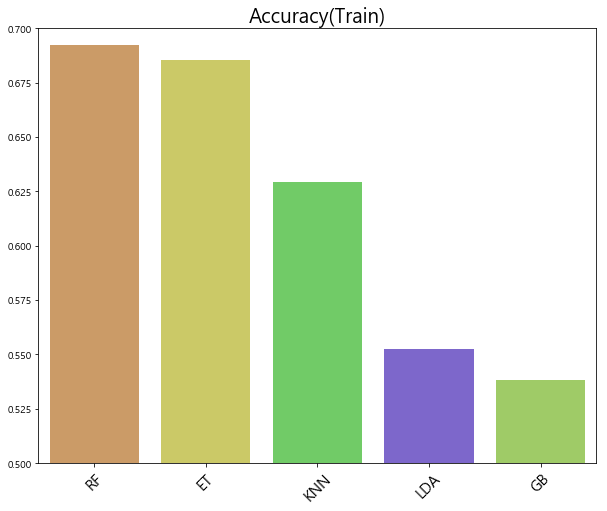

In [107]:

train_keys=sorted(train_dict,key=lambda x:train_dict[x],reverse=True)
train_values=sorted(train_dict.values(),reverse=True)
plt.figure(figsize=(10,8))
plt.title('Accuracy(Train)',fontsize = 20)
plt.xticks(rotation=45,fontsize=15)
plt.ylim((0.5,0.7))

sns.barplot(train_keys,train_values,palette=[color_dict[key] for key in train_keys]) # 그래프가 바뀌어도 분류기에 대한 색깔이 변치 않기위해

KeyError: 'ExtraTreesClassifier'

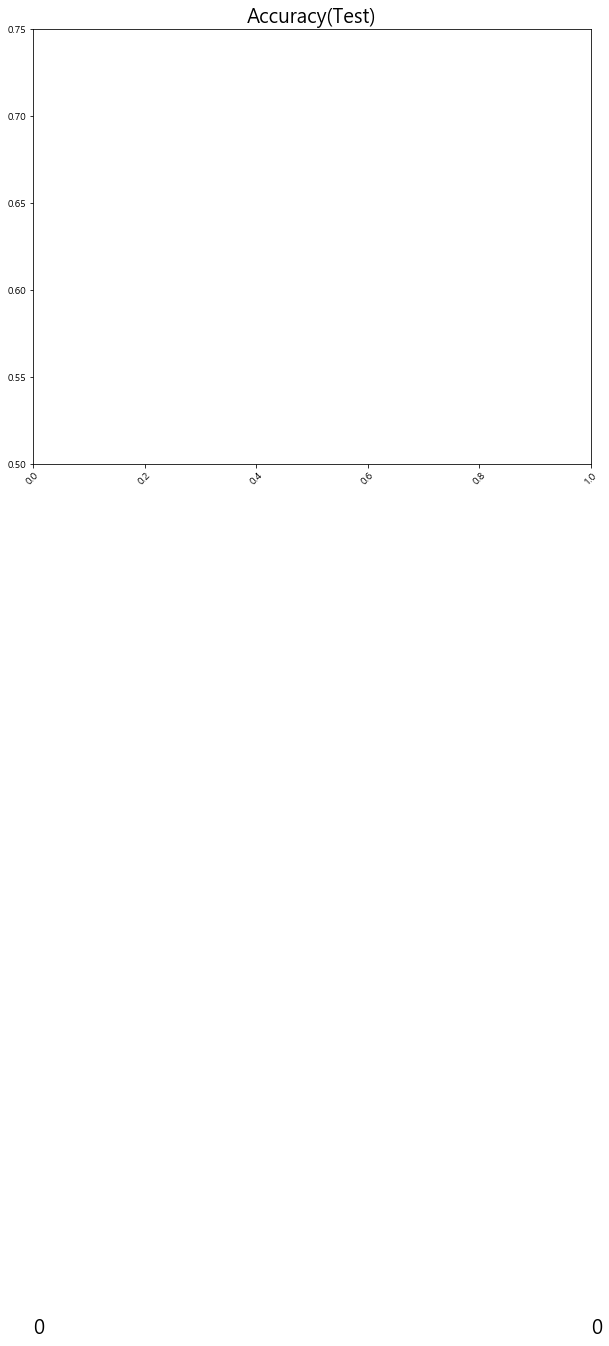

In [108]:
test_dict=Counter()
for element in test_accuracy_list:
    test_dict.update(element)
test_keys=sorted(test_dict.keys(),key=lambda x:test_dict[x],reverse=True)
test_values=sorted(test_dict.values(),reverse=True)
plt.figure(figsize=(10,8))
plt.title('Accuracy(Test)',fontsize=20)
plt.xticks(rotation=45)
plt.ylim((0.5,0.75))
plt.text(0,test_dict['Extratrees'],round(test_dict['Extratrees'],3),fontsize=20)
plt.text(1,test_dict['Kneighbors'],round(test_dict['Kneighbors'],3),fontsize=20)
sns.barplot(test_keys,test_values,palette=[color_dict[key] for key in test_keys])

In [ ]:
precision_score_dict

In [ ]:
for element in precision_score_list:
    for key in element.keys():
        if key.find('RandomForestClassifier')>=0:
            element['RF'] = element[key]
            del element[key]
        if key.find('ExtraTreesClassifier')>=0:        
            element['ET'] = element[key]
            del element[key]
        if key.find('GradientBoostingClassifier')>=0:        
            element['GB'] = element[key]
            del element[key]
        if key.find('KNeighborsClassifier')>=0:        
            element['KNN'] = element[key]
            del element[key]
        if key.find('LogisticRegression')>=0:        
            element['LR'] = element[key]
            del element[key]
        if key.find('XGBClassifier')>=0:        
            element['XGB'] = element[key]
            del element[key]
        if key.find('LinearSVC')>=0:        
            element['LSVC'] = element[key]
            del element[key]        
        if key.find('MLPClassifier')>=0:        
            element['MLP'] = element[key]
            del element[key]
        if key.find('LinearDiscriminantAnalysis')>=0:        
            element['LDA'] = element[key]
            del element[key]
        if key.find('GaussianNB')>=0:        
            element['GNB'] = element[key]
            del element[key]
        if key.find('MultinomialNB')>=0:        
            element['MNB'] = element[key]
            del element[key]
        if key.find('BernoulliNB')>=0:        
            element['BNB'] = element[key]
            del element[key]

In [ ]:
precision_score_dict={}
for element in precision_score_list:
    precision_score_dict.update(element)
precision_score_keys=sorted(precision_score_dict.keys(),key=lambda x:precision_score_dict[x],reverse=True)
precision_score_values=sorted(precision_score_dict.values(),reverse=True)
plt.figure(figsize=(10,8))
plt.title('Precision(Test)',fontsize=20)
plt.xticks(rotation=45)
plt.ylim((0,0.8))
plt.text(1,precision_score_dict['Extratrees'],round(precision_score_dict['Extratrees'],3),fontsize=20)
plt.text(0,precision_score_dict['Kneighbors'],round(precision_score_dict['Kneighbors'],3),fontsize=20)
sns.barplot(precision_score_keys,precision_score_values,palette=[color_dict[key] for key in precision_score_keys])

In [ ]:
train_dict

In [ ]:
test_dict

In [ ]:
half_tt1 = train_dict-test_dict
half_tt2 = test_dict - train_dict
half_tt1.update(half_tt2)
train_test_dict = half_tt1
test_keys=sorted(train_test_dict.keys(),key=lambda x:train_test_dict[x],reverse=True)
test_values=sorted(train_test_dict.values(),reverse=True)
plt.figure(figsize=(10,8))
plt.title('Difference(Train,Test)',fontsize=20)
plt.xticks(rotation=45)
plt.text(1,train_test_dict['Kneighbors'],train_test_dict['Kneighbors'])
plt.text(3,train_test_dict['Extratrees'],train_test_dict['Extratrees'])
sns.barplot(test_keys,test_values,palette=[color_dict[key] for key in test_keys])

# 상위모델 선정 x


In [ ]:
model_result = Counter()
train_result= Counter()
test_result = Counter()
confusion_matrix_result = Counter()
auc_result = Counter()
precision_score_result=Counter()
precision_train_result = Counter()
lenx=X_train.shape
# if lenx[0]<=10 or lenx[1]<=2:
#     continue
classifiers = []
classifiers_not = []
random_state = [4000]



# gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1]
kernel = ['linear', 'rbf', 'sigmoid']#'precomputed','poly'
nfolds=5
criterion = ["gini", 'entropy']
#grid_search = GridSearchCV(SVC(), param_grid_svc, cv=nfolds)
n_estimators = [500,1000,2000]
learning_rate = [0.01]
max_depth = [3, 5, 10, 15 ,20]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
scoring = 'accuracy'
n_jobs= -1
penalty= ['l2']
max_features = [2]
linearscv_param_grid = {'C':Cs, 'penalty':penalty, 'random_state':random_state }

svc_param_grid = {'C': Cs, 'gamma' : gammas,'kernel':kernel, 'random_state':random_state }

ex_param_grid = {"max_depth": [3, 5, 10,15,20],
              "max_features": max_features,
              "bootstrap": [False,True],
              "n_estimators" :n_estimators,
              "criterion": criterion, 'random_state':random_state }


gb_param_grid = {'loss' : ["deviance",'exponential'],
              'n_estimators' : n_estimators,
              'learning_rate': learning_rate,
              'max_depth': max_depth,
              'min_samples_leaf': [200,400,600],
              'max_features': [0.3, 0.1], 'random_state':random_state  
              }

rf_param_grid = {"max_depth": [3,4,5,10,15,20],
              "max_features": max_features,
              "n_estimators" :n_estimators,
              "criterion": criterion, 'random_state':random_state }

logistic_param_grid = {
    'C': Cs                                   
              }

lda_param_grid = {'solver' : ["svd",'lsqr','eigen'],
              'shrinkage ' : ['auto'], 'random_state':random_state 
              }

kneighbor_param_grid = {'n_neighbors':list(range(1,31))}

xgboost_param_grid ={
    'gamma':[i/10.0 for i in range(0,5)],
     'subsample':[i/100.0 for i in range(75,90,5)],
     'colsample_bytree':[i/100.0 for i in range(75,90,5)],
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
    'n_estimators':[100,500,1000,2000], 'random_state':random_state 
}

naive_bayes_param_grid = {
    'priors':None, 'random_state':random_state 
}

mlp_param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05,0.1,1,10,100],
    'learning_rate': ['constant','adaptive'],
    'max_iter':[1000,2000,5000,10000], 'random_state':random_state 
}


#gsExtC = GridSearchCV(ExtraTreesClassifier, param_grid = ex_param_grid, cv=nfold, scoring="auc")

print('X_train_shape:',X_train.shape)
classifiers.append(GridSearchCV(SVC(), svc_param_grid, cv=nfolds,n_jobs=-1))
classifiers.append(GridSearchCV(RandomForestClassifier(),param_grid = rf_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))
classifiers.append(GridSearchCV(ExtraTreesClassifier(), param_grid = ex_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))
classifiers.append(GridSearchCV(GradientBoostingClassifier(),param_grid = gb_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))

classifiers.append(GridSearchCV(KNeighborsClassifier(),param_grid=kneighbor_param_grid,cv=nfolds, scoring=scoring, n_jobs=-1))
classifiers.append(GridSearchCV(LogisticRegression(penalty='l2'),param_grid = logistic_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))

classifiers.append(GridSearchCV(XGBClassifier(silent=True, learning_rate=0.01, objective='binary:logistic'),param_grid=xgboost_param_grid,cv=nfolds,scoring=scoring,n_jobs=-1))
classifiers.append(GridSearchCV(LinearSVC(),param_grid=linearscv_param_grid, scoring=scoring, cv=nfolds,n_jobs=-1))
classifiers.append(GridSearchCV(MLPClassifier(),param_grid=mlp_param_grid,cv=nfolds,n_jobs=-1)) # 제외



classifiers_not.append(LinearDiscriminantAnalysis())# 튜닝 불가능
classifiers_not.append(GaussianNB())
classifiers_not.append(MultinomialNB())
classifiers_not.append(BernoulliNB())



#classifiers.append(XGBClassifier())
test_accuracy_list = []
train_accuracy_list= [] 
model_accuracy_list= []
confusion_matrix_list = []
precision_score_list = []
precision_train_list = []
auc_list = []
for models in classifiers:
    #print(models)
    models.fit(X_train,y_train)
    
    model_str = str(models).split('(')[0]
    print(model_str,':',models.best_params_)
    pre = models.predict(X_test)
    
    tmp_dict1 = {}
    tmp_dict1[model_str] = models.score(X_test,y_test)
    test_accuracy_list.append(tmp_dict1)
    
    tmp_dict2 = {}
    tmp_dict2[model_str] = models.score(X_train,y_train)
    train_accuracy_list.append(tmp_dict2)
    
    tmp_dict3 = {}
    tmp_dict3[model_str] = metrics.accuracy_score(y_test, pre)
    model_accuracy_list.append(tmp_dict3)
    
    # 전역변수로, 지역변수 문제라 생각한다.
    tmp_dict4 = {}
    tmp_dict4[model_str] = confusion_matrix(y_test,pre)
    confusion_matrix_list.append(tmp_dict4)
    
    tmp_dict5 ={}
    tmp_dict5[model_str] = metrics.precision_score(y_test,pre)
    precision_score_list.append(tmp_dict5)
    #confusion_matrix_list.append(confusion_matrix(y_test,pre))
for models in classifiers_not:
    
    models.fit(X_train,y_train)
    
    model_str = str(models).split('(')[0]
    pre = models.predict(X_test)
    
    tmp_dict1 = {}
    tmp_dict1[model_str] = models.score(X_test,y_test)
    test_accuracy_list.append(tmp_dict1)
    
    tmp_dict2 = {}
    tmp_dict2[model_str] = models.score(X_train,y_train)
    train_accuracy_list.append(tmp_dict2)
    
    tmp_dict3 = {}
    tmp_dict3[model_str] = metrics.accuracy_score(y_test, pre)
    model_accuracy_list.append(tmp_dict3)
    
    # 전역변수로, 지역변수 문제라 생각한다.
    tmp_dict4 = {}
    tmp_dict4[model_str] = confusion_matrix(y_test,pre)
    confusion_matrix_list.append(tmp_dict4)
    
    tmp_dict5 ={}
    tmp_dict5[model_str] = metrics.precision_score(y_test,pre)
    precision_score_list.append(tmp_dict5)
    
    
    #confusion_matrix_list.append(confusion_matrix(y_test,pre))    

    
train_result[stock_code] = train_accuracy_list
test_result[stock_code] = test_accuracy_list
model_result[stock_code] = model_accuracy_list
confusion_matrix_result[stock_code] = confusion_matrix_list
precision_score_result[stock_code]=precision_score_list
precision_train_result[stock_code]=precision_train_list



In [ ]:
y_train.shape, y_test.shape

In [ ]:

for idx,element in enumerate(model_list):    
    tmp_dict = {}
    tmp_dict[element] = model_result[stock_code][idx]['GridSearchCV']
    model_result[stock_code][idx] = tmp_dict
print(model_result)
for idx,element in enumerate(model_list):    
    tmp_dict = {}
    tmp_dict[element] = train_result[stock_code][idx]['GridSearchCV']
    train_result[stock_code][idx] = tmp_dict
print(train_result)
for idx,element in enumerate(model_list):    
    tmp_dict = {}
    tmp_dict[element] = test_result[stock_code][idx]['GridSearchCV']
    test_result[stock_code][idx] = tmp_dict
print(test_result)
for idx,element in enumerate(model_list):    
    tmp_dict = {}
    tmp_dict[element] = precision_score_result[stock_code][idx]['GridSearchCV']
    precision_score_result[stock_code][idx] = tmp_dict
print(precision_score_result)     


In [ ]:
color_dict= dict(zip(train_dict.keys(),sns.color_palette("hls", len(classifiers)+len(classifiers_not))))
color_dict

In [ ]:
train_accuracy_list #tmp_dict2

In [ ]:
test_accuracy_list

In [ ]:
#sns.color_palette()
sns.palplot(sns.color_palette("hls", len(classifiers)+len(classifiers_not)))

In [ ]:
for element in sns.color_palette("hls", len(classifiers)+len(classifiers_not)):
    print(element)

In [ ]:
train_dict={}
for element in train_accuracy_list:
    train_dict.update(element)
train_keys=sorted(train_dict,key=lambda x:train_dict[x],reverse=True)
train_values=sorted(train_dict.values(),reverse=True)
plt.figure(figsize=(10,8))
plt.title('Accuracy(Train)',fontsize = 20)
plt.xticks(rotation=45)
sns.barplot(train_keys,train_values,palette=[color_dict[key] for key in train_keys]) # 그래프가 바뀌어도 분류기에 대한 색깔이 변치 않기위해

In [ ]:
precision_train_dict={}
for element in precision_train_list:
    precision_train_dict.update(element)
precision_train_keys=sorted(precision_train_dict.keys(),key=lambda x:precision_train_dict[x],reverse=True)
precision_train_values=sorted(precision_train_dict.values(),reverse=True)
plt.figure(figsize=(10,8))
plt.title('Accuracy(precision_train)',fontsize=20)
plt.xticks(rotation=45)
sns.barplot(precision_train_keys,precision_train_values,palette=[color_dict[key] for key in precision_train_keys])
    

In [ ]:
test_dict={}
for element in test_accuracy_list:
    test_dict.update(element)
test_keys=sorted(test_dict.keys(),key=lambda x:test_dict[x],reverse=True)
test_values=sorted(test_dict.values(),reverse=True)
plt.figure(figsize=(10,8))
plt.title('Accuracy(Test)',fontsize=20)
plt.xticks(rotation=45)
sns.barplot(test_keys,test_values,palette=[color_dict[key] for key in test_keys])

In [ ]:
# confusion_matrix_dict={}
# for element in confusion_matrix_list:
#     confusion_matrix_dict.update(element)
# confusion_matrix_keys=sorted(confusion_matrix_dict,key=operator.itemgetter(1),reverse=True)
# confusion_matrix_values=sorted(confusion_matrix_dict.values(),reverse=True)
# plt.figure(figsize=(10,8))
# plt.xticks(rotation=45)
# sns.barplot(confusion_matrix_keys,confusion_matrix_values)

In [ ]:
precision_score_dict={}
for element in precision_score_list:
    precision_score_dict.update(element)
precision_score_keys=sorted(precision_score_dict.keys(),key=lambda x:precision_score_dict[x],reverse=True)
precision_score_values=sorted(precision_score_dict.values(),reverse=True)
plt.figure(figsize=(10,8))
plt.title('Precision(Test)',fontsize=20)
plt.xticks(rotation=45)
sns.barplot(precision_score_keys,precision_score_values,palette=[color_dict[key] for key in precision_score_keys])

In [ ]:
precision_score_dict

In [ ]:
precision_score_list

In [ ]:
precision_score_keys 

In [ ]:
precision_score_values

In [ ]:
test_accuracy_list #tmp_dict1

In [ ]:
confusion_matrix_list #tmp_dict4

In [ ]:
precision_score_list #tmp_dict5

### scaling 이전 end

In [ ]:
X_train = train_pos_neg_processing(X_train_raw)
X_test = train_pos_neg_processing(X_test_raw)

### scaling 이후 start

In [ ]:
X_train['긍정'] = X_train['긍정']/X_train['긍정'].max()
X_train['부정'] = X_train['부정']/X_train['부정'].max()
X_test['긍정'] = X_test['긍정']/X_test['긍정'].max()
X_test['부정'] = X_test['부정']/X_test['부정'].max()

In [ ]:
model_result = Counter()
train_result= Counter()
test_result = Counter()
confusion_matrix_result = Counter()
auc_result = Counter()
lenx=X_train.shape
# if lenx[0]<=10 or lenx[1]<=2:
#     continue
classifiers = []
classifiers_not = []
random_state = [4000]



# gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1]
kernel = ['linear', 'rbf', 'sigmoid']#'precomputed','poly'
nfolds=5
criterion = ["gini", 'entropy']
#grid_search = GridSearchCV(SVC(), param_grid_svc, cv=nfolds)
n_estimators = [500,1000,2000]
learning_rate = [0.01]
max_depth = [3, 5, 10, 15 ,20]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
scoring = 'accuracy'
n_jobs= -1
penalty= ['l2']
max_features = [2]
linearscv_param_grid = {'C':Cs, 'penalty':penalty, 'random_state':random_state }

svc_param_grid = {'C': Cs, 'gamma' : gammas,'kernel':kernel, 'random_state':random_state }

ex_param_grid = {"max_depth": [3, 5, 10,15,20],
              "max_features": max_features,
              "bootstrap": [False,True],
              "n_estimators" :n_estimators,
              "criterion": criterion, 'random_state':random_state }


gb_param_grid = {'loss' : ["deviance",'exponential'],
              'n_estimators' : n_estimators,
              'learning_rate': learning_rate,
              'max_depth': max_depth,
              'min_samples_leaf': [200,400,600],
              'max_features': [0.3, 0.1], 'random_state':random_state  
              }

rf_param_grid = {"max_depth": [3,4,5,10,15,20],
              "max_features": max_features,
              "n_estimators" :n_estimators,
              "criterion": criterion, 'random_state':random_state }

logistic_param_grid = {
    'C': Cs                                   
              }

lda_param_grid = {'solver' : ["svd",'lsqr','eigen'],
              'shrinkage ' : ['auto'], 'random_state':random_state 
              }

kneighbor_param_grid = {'n_neighbors':list(range(1,31))}

xgboost_param_grid ={
    'gamma':[i/10.0 for i in range(0,5)],
     'subsample':[i/100.0 for i in range(75,90,5)],
     'colsample_bytree':[i/100.0 for i in range(75,90,5)],
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
    'n_estimators':[100,500,1000,2000], 'random_state':random_state 
}

naive_bayes_param_grid = {
    'priors':None, 'random_state':random_state 
}

mlp_param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05,0.1,1,10,100],
    'learning_rate': ['constant','adaptive'],
    'max_iter':[1000,2000,5000,10000], 'random_state':random_state 
}


#gsExtC = GridSearchCV(ExtraTreesClassifier, param_grid = ex_param_grid, cv=nfold, scoring="auc")

print('X_train_shape:',X_train.shape)
classifiers.append(GridSearchCV(SVC(), svc_param_grid, cv=nfolds,n_jobs=-1))
classifiers.append(GridSearchCV(RandomForestClassifier(),param_grid = rf_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))
classifiers.append(GridSearchCV(ExtraTreesClassifier(), param_grid = ex_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))
classifiers.append(GridSearchCV(GradientBoostingClassifier(),param_grid = gb_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))

classifiers.append(GridSearchCV(KNeighborsClassifier(),param_grid=kneighbor_param_grid,cv=nfolds, scoring=scoring, n_jobs=-1))
classifiers.append(GridSearchCV(LogisticRegression(penalty='l2'),param_grid = logistic_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))

classifiers.append(GridSearchCV(XGBClassifier(silent=True, learning_rate=0.01, objective='binary:logistic'),param_grid=xgboost_param_grid,cv=nfolds,scoring=scoring,n_jobs=-1))
classifiers.append(GridSearchCV(LinearSVC(),param_grid=linearscv_param_grid, scoring=scoring, cv=nfolds,n_jobs=-1))
classifiers.append(GridSearchCV(MLPClassifier(),param_grid=mlp_param_grid,cv=nfolds,n_jobs=-1)) # 제외



classifiers_not.append(LinearDiscriminantAnalysis())# 튜닝 불가능
classifiers_not.append(GaussianNB())
classifiers_not.append(MultinomialNB())
classifiers_not.append(BernoulliNB())



#classifiers.append(XGBClassifier())
test_accuracy_list = []
train_accuracy_list= [] 
model_accuracy_list= []
confusion_matrix_list = []
auc_list = []
for models in classifiers:
    #print(models)
    models.fit(X_train,y_train)
    
    model_str = str(models).split('(')[0]
    print(model_str,':',models.best_params_)
    pre = models.predict(X_test)
    
    tmp_dict1 = {}
    tmp_dict1[model_str] = models.score(X_test,y_test)
    test_accuracy_list.append(tmp_dict1)
    
    tmp_dict2 = {}
    tmp_dict2[model_str] = models.score(X_train,y_train)
    train_accuracy_list.append(tmp_dict2)
    
    tmp_dict3 = {}
    tmp_dict3[model_str] = metrics.accuracy_score(y_test, pre)
    model_accuracy_list.append(tmp_dict3)
    
    # 전역변수로, 지역변수 문제라 생각한다.
    tmp_dict4 = {}
    tmp_dict4[model_str] = confusion_matrix(y_test,pre)
    confusion_matrix_list.append(tmp_dict4)
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, pre)
    tmp_dict5 = {}
    tmp_dict5[model_str] = metrics.auc(fpr, tpr)
    auc_list.append(tmp_dict5)
    #confusion_matrix_list.append(confusion_matrix(y_test,pre))
for models in classifiers_not:
    
    models.fit(X_train,y_train)
    
    model_str = str(models).split('(')[0]
    pre = models.predict(X_test)
    
    tmp_dict1 = {}
    tmp_dict1[model_str] = models.score(X_test,y_test)
    test_accuracy_list.append(tmp_dict1)
    
    tmp_dict2 = {}
    tmp_dict2[model_str] = models.score(X_train,y_train)
    train_accuracy_list.append(tmp_dict2)
    
    tmp_dict3 = {}
    tmp_dict3[model_str] = metrics.accuracy_score(y_test, pre)
    model_accuracy_list.append(tmp_dict3)
    
    # 전역변수로, 지역변수 문제라 생각한다.
    tmp_dict4 = {}
    tmp_dict4[model_str] = confusion_matrix(y_test,pre)
    confusion_matrix_list.append(tmp_dict4)
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, pre)
    tmp_dict5 = {}
    tmp_dict5[model_str] = metrics.auc(fpr, tpr)
    auc_list.append(tmp_dict5)
    #confusion_matrix_list.append(confusion_matrix(y_test,pre))    

    
train_result[stock_code] = train_accuracy_list
test_result[stock_code] = test_accuracy_list
model_result[stock_code] = model_accuracy_list
confusion_matrix_result[stock_code] = confusion_matrix_list
auc_result[stock_code] = auc_list


In [ ]:
model_list=['svc',
'randomforestclassifier',
'extratreesclassifier',
'gradientboostingclassifier',
'kneighborsclassfier',
'logisticregression',
'xgbclassifier',
'linearsvc',
'mlpclassifier']

In [ ]:
for idx,element in enumerate(model_list):    
    tmp_dict = {}
    tmp_dict[element] = confusion_matrix_result[stock_code][idx]['GridSearchCV']
    confusion_matrix_result[stock_code][idx] = tmp_dict
print(confusion_matrix_result)
for idx,element in enumerate(model_list):    
    tmp_dict = {}
    tmp_dict[element] = model_result[stock_code][idx]['GridSearchCV']
    model_result[stock_code][idx] = tmp_dict
print(model_result)
for idx,element in enumerate(model_list):    
    tmp_dict = {}
    tmp_dict[element] = train_result[stock_code][idx]['GridSearchCV']
    train_result[stock_code][idx] = tmp_dict
print(train_result)
for idx,element in enumerate(model_list):    
    tmp_dict = {}
    tmp_dict[element] = test_result[stock_code][idx]['GridSearchCV']
    test_result[stock_code][idx] = tmp_dict
print(test_result)

### scaling 이후 end

## Xgboost의 장점
1. 규제가 가능하다.  
2. 병렬처리 가능 - 트리 구조를 생각하면 된다.  
3. Built-in Cross-Validation
4. max_depths 까지 간 후에 backword로 Tree Pruning:
5. Continue on Existing Model
6. XGBoost allow users to define custom optimization objectives and evaluation criteria.  

- 참고 사이트  
https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [ ]:
model_result = Counter()
train_result= Counter()
test_result = Counter()
confusion_matrix_result = Counter()
auc_result = Counter()

lenx=X_train.shape
# if lenx[0]<=10 or lenx[1]<=2:
#     continue
classifiers = []
classifiers_not = []
random_state = [4000]



# gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1]
kernel = ['linear', 'rbf', 'sigmoid']#'precomputed','poly'
nfolds=5
criterion = ["gini", 'entropy']
#grid_search = GridSearchCV(SVC(), param_grid_svc, cv=nfolds)
n_estimators = [500,1000,2000]
learning_rate = [0.01]
max_depth = [3, 5, 10, 15 ,20]
max_features = [1]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
scoring = 'accuracy'
n_jobs= -1
penalty= ['l2']

linearscv_param_grid = {'C':Cs, 'penalty':penalty, 'random_state':random_state }

svc_param_grid = {'C': Cs, 'gamma' : gammas,'kernel':kernel, 'random_state':random_state }

ex_param_grid = {"max_depth": [3, 5, 10,15,20],
              "max_features": max_features,
              "bootstrap": [False,True],
              "n_estimators" :n_estimators,
              "criterion": criterion, 'random_state':random_state }


gb_param_grid = {'loss' : ["deviance",'exponential'],
              'n_estimators' : n_estimators,
              'learning_rate': learning_rate,
              'max_depth': max_depth,
              'min_samples_leaf': [200,400,600],
              'max_features': [0.3, 0.1], 'random_state':random_state  
              }

rf_param_grid = {"max_depth": [3,4,5,10,15,20],
              "max_features": max_features,
              "n_estimators" :n_estimators,
              "criterion": criterion, 'random_state':random_state }

logistic_param_grid = {
    'C': Cs                                   
              }

lda_param_grid = {'solver' : ["svd",'lsqr','eigen'],
              'shrinkage ' : ['auto'], 'random_state':random_state 
              }

kneighbor_param_grid = {'n_neighbors':list(range(1,31))}

xgboost_param_grid ={
    'gamma':[i/10.0 for i in range(0,5)],
     'subsample':[i/100.0 for i in range(75,90,5)],
     'colsample_bytree':[i/100.0 for i in range(75,90,5)],
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
    'n_estimators':[100,500,1000,2000], 'random_state':random_state 
}

naive_bayes_param_grid = {
    'priors':None, 'random_state':random_state 
}

mlp_param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05,0.1,1,10,100],
    'learning_rate': ['constant','adaptive'],
    'max_iter':[1000,2000,5000,10000], 'random_state':random_state 
}


#gsExtC = GridSearchCV(ExtraTreesClassifier, param_grid = ex_param_grid, cv=nfold, scoring="auc")

print('X_train_shape:',X_train.shape)
classifiers.append(GridSearchCV(SVC(), svc_param_grid, cv=nfolds,n_jobs=-1))
classifiers.append(GridSearchCV(RandomForestClassifier(),param_grid = rf_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))
classifiers.append(GridSearchCV(ExtraTreesClassifier(), param_grid = ex_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))
classifiers.append(GridSearchCV(GradientBoostingClassifier(),param_grid = gb_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))

classifiers.append(GridSearchCV(KNeighborsClassifier(),param_grid=kneighbor_param_grid,cv=nfolds, scoring=scoring, n_jobs=-1))
classifiers.append(GridSearchCV(LogisticRegression(penalty='l2'),param_grid = logistic_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))

classifiers.append(GridSearchCV(XGBClassifier(silent=True, learning_rate=0.01, objective='binary:logistic'),param_grid=xgboost_param_grid,cv=nfolds,scoring=scoring,n_jobs=-1))
classifiers.append(GridSearchCV(LinearSVC(),param_grid=linearscv_param_grid, scoring=scoring, cv=nfolds,n_jobs=-1))
classifiers.append(GridSearchCV(MLPClassifier(),param_grid=mlp_param_grid,cv=nfolds,n_jobs=-1)) # 제외



classifiers_not.append(LinearDiscriminantAnalysis())# 튜닝 불가능
classifiers_not.append(GaussianNB())
classifiers_not.append(MultinomialNB())
classifiers_not.append(BernoulliNB())



#classifiers.append(XGBClassifier())
test_accuracy_list = []
train_accuracy_list= [] 
model_accuracy_list= []
confusion_matrix_list = []
auc_list = []
for models in classifiers:
    #print(models)
    models.fit(X_train,y_train)
    
    model_str = str(models).split('(')[0]
    print(model_str,':',models.best_params_)
    pre = models.predict(X_test)
    
    tmp_dict1 = {}
    tmp_dict1[model_str] = models.score(X_test,y_test)
    test_accuracy_list.append(tmp_dict1)
    
    tmp_dict2 = {}
    tmp_dict2[model_str] = models.score(X_train,y_train)
    train_accuracy_list.append(tmp_dict2)
    
    tmp_dict3 = {}
    tmp_dict3[model_str] = metrics.accuracy_score(y_test, pre)
    model_accuracy_list.append(tmp_dict3)
    
    # 전역변수로, 지역변수 문제라 생각한다.
    tmp_dict4 = {}
    tmp_dict4[model_str] = confusion_matrix(y_test,pre)
    confusion_matrix_list.append(tmp_dict4)
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, pre)
    tmp_dict5 = {}
    tmp_dict5[model_str] = metrics.auc(fpr, tpr)
    auc_list.append(tmp_dict5)
    #confusion_matrix_list.append(confusion_matrix(y_test,pre))
for models in classifiers_not:
    
    models.fit(X_train,y_train)
    
    model_str = str(models).split('(')[0]
    pre = models.predict(X_test)
    
    tmp_dict1 = {}
    tmp_dict1[model_str] = models.score(X_test,y_test)
    test_accuracy_list.append(tmp_dict1)
    
    tmp_dict2 = {}
    tmp_dict2[model_str] = models.score(X_train,y_train)
    train_accuracy_list.append(tmp_dict2)
    
    tmp_dict3 = {}
    tmp_dict3[model_str] = metrics.accuracy_score(y_test, pre)
    model_accuracy_list.append(tmp_dict3)
    
    # 전역변수로, 지역변수 문제라 생각한다.
    tmp_dict4 = {}
    tmp_dict4[model_str] = confusion_matrix(y_test,pre)
    confusion_matrix_list.append(tmp_dict4)
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, pre)
    tmp_dict5 = {}
    tmp_dict5[model_str] = metrics.auc(fpr, tpr)
    auc_list.append(tmp_dict5)
    #confusion_matrix_list.append(confusion_matrix(y_test,pre))    

    
train_result[stock_code] = train_accuracy_list
test_result[stock_code] = test_accuracy_list
model_result[stock_code] = model_accuracy_list
confusion_matrix_result[stock_code] = confusion_matrix_list
auc_result[stock_code] = auc_list


GridSearchCV : {'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}
GridSearchCV : {'criterion': 'gini', 'max_depth': 5, 'max_features': 12, 'n_estimators': 500}
GridSearchCV : {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 11, 'n_estimators': 500}
GridSearchCV : {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 3, 'max_features': 0.3, 'min_samples_leaf': 200, 'n_estimators': 500}
GridSearchCV : {'n_neighbors': 19}
GridSearchCV : {'C': 0.01}
GridSearchCV : {'colsample_bytree': 0.8, 'gamma': 0.4, 'n_estimators': 1000, 'reg_alpha': 1e-05, 'subsample': 0.75}
GridSearchCV : {'C': 0.001, 'penalty': 'l2'}
GridSearchCV : {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'max_iter': 10000, 'solver': 'adam'}

In [ ]:
# model_result = Counter()
# train_result= Counter()
# test_result = Counter()
# confusion_matrix_result = Counter()
# auc_result = Counter()
# one_code_list = all_dict[stock_code]
# tag_list = [tag[0] for tag in one_code_list[:int(len(one_code_list)*0.2)]]
# y = np.where(earning_data>=0,1,0)
# x= data_filter_freq[tag_list]
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, shuffle=False)
# lenx=X_train.shape
# # if lenx[0]<=10 or lenx[1]<=2 :
# #     continue
# random_state = 2
# classifiers = []
# # rf_param_grid = {"max_depth": [10,15,20],
# #               "max_features": [7,8,9,10,11,12],
# #               "n_estimators" :[2000],
# #               "criterion": ["gini",'entropy']}


# # gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# classifiers.append(SVC(random_state=random_state,C=0.0001))
# classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
# classifiers.append(RandomForestClassifier(random_state=random_state,n_estimators=1000,max_depth=3))
# classifiers.append(ExtraTreesClassifier(random_state=random_state))
# classifiers.append(GradientBoostingClassifier(random_state=random_state,learning_rate=0.01))
# classifiers.append(MLPClassifier(random_state=random_state,max_iter=2000)) # 제외
# classifiers.append(KNeighborsClassifier())
# classifiers.append(LogisticRegression(random_state = random_state,C=0.001))
# classifiers.append(LinearDiscriminantAnalysis())# 여기까지
# classifiers.append(GaussianNB())
# classifiers.append(MultinomialNB())
# classifiers.append(BernoulliNB())
# classifiers.append(XGBClassifier(silent=True, learning_rate=0.01, subsample=0.8, objective='binary:logistic',n_estimators=1000,reg_alpha=0.3))
# classifiers.append(LinearSVC(random_state=100,C=0.01))
# #classifiers.append(XGBClassifier())
# test_accuracy_list = []
# train_accuracy_list= [] 
# model_accuracy_list= []
# confusion_matrix_list = []
# auc_list = []
# for models in classifiers:
#     #print(models)
#     models.fit(X_train,y_train)
#     model_str = str(models).split('(')[0]
#     pre = models.predict(X_test)
    
#     tmp_dict1 = {}
#     tmp_dict1[model_str] = models.score(X_test,y_test)
#     test_accuracy_list.append(tmp_dict1)
    
#     tmp_dict2 = {}
#     tmp_dict2[model_str] = models.score(X_train,y_train)
#     train_accuracy_list.append(tmp_dict2)
    
#     tmp_dict3 = {}
#     tmp_dict3[model_str] = metrics.accuracy_score(y_test, pre)
#     model_accuracy_list.append(tmp_dict3)
    
#     # 전역변수로, 지역변수 문제라 생각한다.
#     tmp_dict4 = {}
#     tmp_dict4[model_str] = confusion_matrix(y_test,pre)
#     confusion_matrix_list.append(tmp_dict4)
    
#     fpr, tpr, thresholds = metrics.roc_curve(y_test, pre)
#     tmp_dict5 = {}
#     tmp_dict5[model_str] = metrics.auc(fpr, tpr)
#     auc_list.append(tmp_dict5)
#     #confusion_matrix_list.append(confusion_matrix(y_test,pre))
    
# train_result[stock_code] = train_accuracy_list
# test_result[stock_code] = test_accuracy_list
# model_result[stock_code] = model_accuracy_list
# confusion_matrix_result[stock_code] = confusion_matrix_list
# auc_result[stock_code] = auc_list


In [ ]:
# for model in classifiers:
#     print(model)
#     #model_str = str(model)
#     #print(type(model_str))
#     #print(model_str.split('(')[0])

In [ ]:
ratio_y = y.sum()/len(y)
print(ratio_y,1-ratio_y)

In [ ]:
ratio_y_test = y_test.sum()/len(y_test)
print(ratio_y_test,1-ratio_y_test)

In [ ]:
# models = LinearDiscriminantAnalysis(solver='eigen')
# models.fit(X_train,y_train)
# model_str = str(models).split('(')[0]
# pre = models.predict(X_test)
# models.score(X_test,y_test)

In [ ]:
# models = LinearDiscriminantAnalysis(solver='lsqr')
# models.fit(X_train,y_train)
# model_str = str(models).split('(')[0]
# pre = models.predict(X_test)
# models.score(X_test,y_test)

In [ ]:
model_list=['svc',
'randomforestclassifier',
'extratreesclassifier',
'gradientboostingclassifier',
'kneighborsclassfier',
'logisticregression',
'xgbclassifier',
'linearsvc',
'mlpclassifier']

In [ ]:
for idx,element in enumerate(model_list):    
    tmp_dict = {}
    tmp_dict[element] = confusion_matrix_result[stock_code][idx]['GridSearchCV']
    confusion_matrix_result[stock_code][idx] = tmp_dict
print(confusion_matrix_result)
for idx,element in enumerate(model_list):    
    tmp_dict = {}
    tmp_dict[element] = model_result[stock_code][idx]['GridSearchCV']
    model_result[stock_code][idx] = tmp_dict
print(model_result)
for idx,element in enumerate(model_list):    
    tmp_dict = {}
    tmp_dict[element] = train_result[stock_code][idx]['GridSearchCV']
    train_result[stock_code][idx] = tmp_dict
print(train_result)
for idx,element in enumerate(model_list):    
    tmp_dict = {}
    tmp_dict[element] = test_result[stock_code][idx]['GridSearchCV']
    test_result[stock_code][idx] = tmp_dict
print(test_result)


In [ ]:
print(confusion_matrix_result)
print(model_result)
print(train_result)
print(test_result)

In [ ]:
# for i in range(len(earning_data)-2):
#     eidx = earning_data.index
#     # 수익률 이전 행 날짜가 전날 날짜가 아니라 그이상 차이가 날때
#     if (eidx[i+1] - eidx[i]).days > 1:
#         # 휴일 or 주말이 끼면 그 날을 포함해서 다음 날에 반영한다.
#         try:
#             #data_filter_freq가 earning_data 보다 날짜가 하나 적다.
#             print(data_filter_freq[eidx[i]+relativedelta(days=1):eidx[i+1]].sum()) # [i]는 [i+1]보다 1이상 차이난다.
#             # 근데 data_filter_freq 데이터에서 earning_data의 인덱스가 없는 경우가 있다.
#             data_filter_freq.loc[eidx[i+1],:] = data_filter_freq[eidx[i]+relativedelta(days=1):eidx[i+1]].sum()
#             #del(data_filter_freq[eidx[i]+relativedelta(days=1):eidx[i+1]-relativedelta(days=1)])

#             #data_filter_freq.drop(pd.date_range(eidx[i]+relativedelta(days=1),eidx[i+1]-relativedelta(days=1)),axis=0,inplace=True)
#         except:
#             print(i)
#         #KeyError 발생
#         #해결방법
#         #1.존재 여부를 일일이 살펴 제어문을 걸어준다.
#         #2. 
        

In [ ]:
#{'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 8, 'n_estimators': 500, 'random_state': 4000}


모든 학습 모델들이 overfitting하여 이에 대한 해결책이 필요하다.
1. 학습 데이터 비율증가.
2. 파라미터 튜닝  - 가장 성능이 좋은 extraclassifier에 대해서 해준다.


- n_estimators  값 증가
- max_feature 줄이기
- max_depths 줄이기

In [ ]:
XGBClassifier(silent=True, learning_rate=0.01)

In [ ]:
a = Counter({'021240': [{'svc': 0.647887323943662}, {'randomforestclassifier': 0.676056338028169}, {'extratreesclassifier': 0.5774647887323944}, {'gradientboostingclassifier': 0.5352112676056338}, {'kneighborsclassfier': 0.6619718309859155}, {'logisticregression': 0.5352112676056338}, {'xgbclassifier': 0.6619718309859155}, {'linearsvc': 0.5352112676056338}, {'mlpclassifier': 0.676056338028169}, {'LinearDiscriminantAnalysis': 0.6901408450704225}, {'GaussianNB': 0.5492957746478874}, {'MultinomialNB': 0.5352112676056338}, {'BernoulliNB': 0.5492957746478874}]})

In [ ]:
train_accuracy_list.

In [ ]:
k_pos = ()
for k,i in enumerate(train_accuracy_list):
    for s in i.values():
        k_pos = s

In [ ]:
k_pos

In [ ]:
test_accuracy_lis

In [ ]:
confusion_matrix_list

In [ ]:
precision_score_list

In [ ]:
model_list

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots()

In [ ]:
machine = ('svc', 'randomforestclassifier', 'extratreesclassifier', 'gradientboostingclassifier', 'kneighborsclassfier','logisticregression'
         ,'xgbclassifier','linearsvc','mlpclassifier','LinearDiscriminantAnalysis','GaussianNB','MultinomialNB','BernoulliNB')

In [ ]:
ax.bar(y_pos, performance, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

In [ ]:
model_result = Counter()
train_result= Counter()
test_result = Counter()
confusion_matrix_result = Counter()
auc_result = Counter()
precision_score_result=Counter()
precision_train_result = Counter()
lenx=X_train.shape
# if lenx[0]<=10 or lenx[1]<=2:
#     continue
classifiers = []
classifiers_not = []
random_state = [4000]



# gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1]
kernel = ['linear', 'rbf', 'sigmoid']#'precomputed','poly'
nfolds=5
criterion = ["gini", 'entropy']
#grid_search = GridSearchCV(SVC(), param_grid_svc, cv=nfolds)
n_estimators = [500,1000,2000]
learning_rate = [0.01]
max_depth = [3, 5, 10, 15 ,20]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
scoring = 'accuracy'
n_jobs= -1
penalty= ['l2']
max_features = [2]
linearscv_param_grid = {'C':Cs, 'penalty':penalty, 'random_state':random_state }

svc_param_grid = {'C': Cs, 'gamma' : gammas,'kernel':kernel, 'random_state':random_state }

ex_param_grid = {"max_depth": [3, 5, 10,15,20],
              "max_features": max_features,
              "bootstrap": [False,True],
              "n_estimators" :n_estimators,
              "criterion": criterion, 'random_state':random_state }


gb_param_grid = {'loss' : ["deviance",'exponential'],
              'n_estimators' : n_estimators,
              'learning_rate': learning_rate,
              'max_depth': max_depth,
              'min_samples_leaf': [200,400,600],
              'max_features': [0.3, 0.1], 'random_state':random_state  
              }

rf_param_grid = {"max_depth": [3,4,5,10,15,20],
              "max_features": max_features,
              "n_estimators" :n_estimators,
              "criterion": criterion, 'random_state':random_state }

logistic_param_grid = {
    'C': Cs                                   
              }

lda_param_grid = {'solver' : ["svd",'lsqr','eigen'],
              'shrinkage ' : ['auto'], 'random_state':random_state 
              }

kneighbor_param_grid = {'n_neighbors':list(range(1,31))}

xgboost_param_grid ={
    'gamma':[i/10.0 for i in range(0,5)],
     'subsample':[i/100.0 for i in range(75,90,5)],
     'colsample_bytree':[i/100.0 for i in range(75,90,5)],
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
    'n_estimators':[100,500,1000,2000], 'random_state':random_state 
}

naive_bayes_param_grid = {
    'priors':None, 'random_state':random_state 
}

mlp_param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05,0.1,1,10,100],
    'learning_rate': ['constant','adaptive'],
    'max_iter':[1000,2000,5000,10000], 'random_state':random_state 
}


#gsExtC = GridSearchCV(ExtraTreesClassifier, param_grid = ex_param_grid, cv=nfold, scoring="auc")

print('X_train_shape:',X_train.shape)
classifiers.append(GridSearchCV(SVC(), svc_param_grid, cv=nfolds,n_jobs=-1))
classifiers.append(GridSearchCV(RandomForestClassifier(),param_grid = rf_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))
classifiers.append(GridSearchCV(ExtraTreesClassifier(), param_grid = ex_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))

classifiers.append(GridSearchCV(KNeighborsClassifier(),param_grid=kneighbor_param_grid,cv=nfolds, scoring=scoring, n_jobs=-1))
classifiers.append(GridSearchCV(LogisticRegression(penalty='l2'),param_grid = logistic_param_grid, cv=nfolds, scoring=scoring, n_jobs=-1))

classifiers.append(GridSearchCV(XGBClassifier(silent=True, learning_rate=0.01, objective='binary:logistic'),param_grid=xgboost_param_grid,cv=nfolds,scoring=scoring,n_jobs=-1))
classifiers.append(GridSearchCV(LinearSVC(),param_grid=linearscv_param_grid, scoring=scoring, cv=nfolds,n_jobs=-1))
classifiers.append(GridSearchCV(MLPClassifier(),param_grid=mlp_param_grid,cv=nfolds,n_jobs=-1)) # 제외



classifiers_not.append(LinearDiscriminantAnalysis())# 튜닝 불가능
classifiers_not.append(GaussianNB())
classifiers_not.append(MultinomialNB())
classifiers_not.append(BernoulliNB())



#classifiers.append(XGBClassifier())
test_accuracy_list = []
train_accuracy_list= [] 
model_accuracy_list= []
confusion_matrix_list = []
precision_score_list = []
precision_train_list = []
auc_list = []
for models in classifiers:
    #print(models)
    models.fit(X_train,y_train)
    
    model_str = str(models).split('(')[0]
    print(model_str,':',models.best_params_)
    pre = models.predict(X_test)
    
    tmp_dict1 = {}
    tmp_dict1[model_str] = models.score(X_test,y_test)
    test_accuracy_list.append(tmp_dict1)
    
    tmp_dict2 = {}
    tmp_dict2[model_str] = models.score(X_train,y_train)
    train_accuracy_list.append(tmp_dict2)
    
    tmp_dict3 = {}
    tmp_dict3[model_str] = metrics.accuracy_score(y_test, pre)
    model_accuracy_list.append(tmp_dict3)
    
    # 전역변수로, 지역변수 문제라 생각한다.
    tmp_dict4 = {}
    tmp_dict4[model_str] = confusion_matrix(y_test,pre)
    confusion_matrix_list.append(tmp_dict4)
    
    tmp_dict5 ={}
    tmp_dict5[model_str] = metrics.precision_score(y_test,pre)
    precision_score_list.append(tmp_dict5)
    #confusion_matrix_list.append(confusion_matrix(y_test,pre))
for models in classifiers_not:
    
    models.fit(X_train,y_train)
    
    model_str = str(models).split('(')[0]
    pre = models.predict(X_test)
    
    tmp_dict1 = {}
    tmp_dict1[model_str] = models.score(X_test,y_test)
    test_accuracy_list.append(tmp_dict1)
    
    tmp_dict2 = {}
    tmp_dict2[model_str] = models.score(X_train,y_train)
    train_accuracy_list.append(tmp_dict2)
    
    tmp_dict3 = {}
    tmp_dict3[model_str] = metrics.accuracy_score(y_test, pre)
    model_accuracy_list.append(tmp_dict3)
    
    # 전역변수로, 지역변수 문제라 생각한다.
    tmp_dict4 = {}
    tmp_dict4[model_str] = confusion_matrix(y_test,pre)
    confusion_matrix_list.append(tmp_dict4)
    
    tmp_dict5 ={}
    tmp_dict5[model_str] = metrics.precision_score(y_test,pre)
    precision_score_list.append(tmp_dict5)
    
    
    #confusion_matrix_list.append(confusion_matrix(y_test,pre))    

    
train_result[stock_code] = train_accuracy_list
test_result[stock_code] = test_accuracy_list
model_result[stock_code] = model_accuracy_list
confusion_matrix_result[stock_code] = confusion_matrix_list
precision_score_result[stock_code]=precision_score_list
precision_train_result[stock_code]=precision_train_list



In [ ]:
csv_file

In [ ]:
stock_code = '000660'
path = './data/freq2/naver_{0}_freq.parquet/'.format(stock_code)
abs_path = os.path.abspath('../file_list/crawl_data/naver_{0}.csv'.format(stock_code))
csv_file = pd.read_csv(abs_path,header=None)

In [ ]:
for idx, element in enumerate(csv_file.loc[:,7]):
    if str(element).find('의견')>=0:
        print(idx)
        print(csv_file.loc[idx,1])
        print(element)
        
        break

In [ ]:
csv_file.loc[:,7]